# Radial Basis Function Network (RBF/RBN/RBFN)

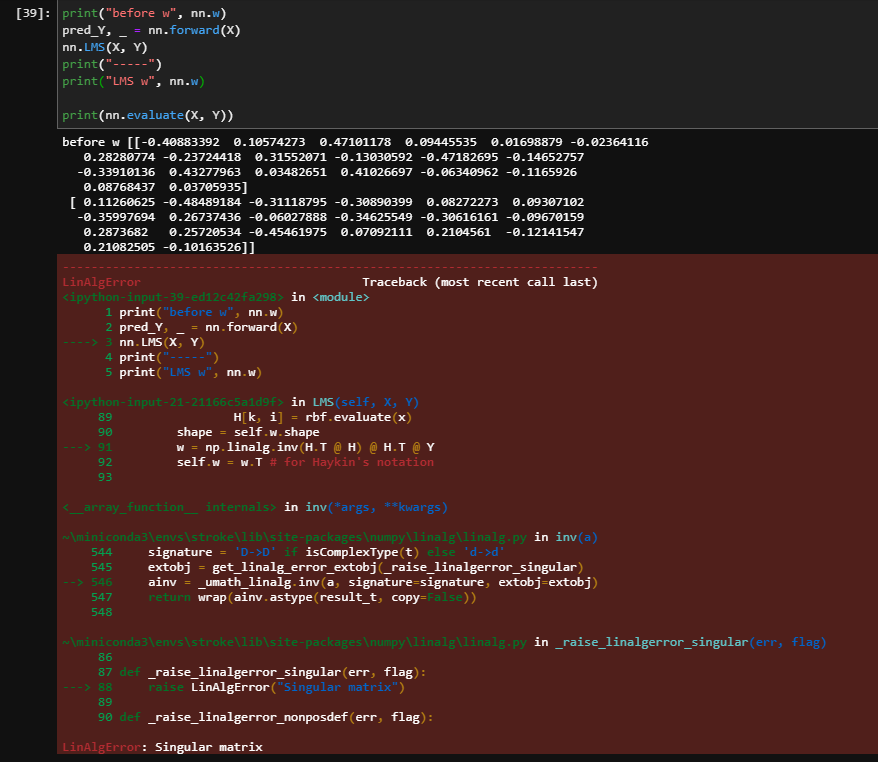

## Questions

1. LMS weight explodes, predicts only 1 class
- Rand index, compare with the library
- K-means --> sensitivity dealt with fixed, random intiailization
- demo a single component

2. Bias
- minimalism
- don't have to combinatorial
- not holistic

3. Fuzzy covariance matrix per neuron
- GK 

4. Cov for each radial unit

5. How many datasets?

7. LinAlgError: Singular matrix
- cov C -> dxd inv
- det(A) = 0 => not invertible
- increase diversity, so that it is not underdetermined (#samples helps)
- some people use diagonialization padding -> add some epsilon across the diagonal = stop fire
 
8. Viz
- cluster id
- sets of points
- uniform number of points?
- 90%


- weight vector on the last layer -> which one is not used, is used?
- look at linear layer -> average

- linear equation <-

- covariance,
- rerport mean, correspondence, closest matching





<hr>

## Part 1 
### Exploring radial basis functions/networks (RBFs/RBNs)
#### (Do Part 1 if you took Computational Intelligence)

*You can receive up to* $90\%$ *credit for achieving the following*

Implement the following RBF/RBN  

 * Input layer, $\vec{x}=( x_1, x_2, ..., x_D )^t$ 
 * Single hidden layer of $J$ radial units, $h_j( \vec{x} ; (\vec{\mu}_j, \sigma_j) )$
 * Output layer with $C$ neurons, $o_c = \vec{w}_c^t \vec{h}$ (plus bias term if you like)

Solve this network via

 1. Two step process: k-means followed by gradient descent  
 2. Two step process: k-means followed by least means square
 3. Unified framework: gradient descent and backprop

Coding

 * You have to write k-means yourself (you cannot use an existing library)
 * You need to implement gradient descent and back prop yourself (no PyTorch'n it or other libraries)
 * You can use existing libraries to do basic things: e.g., load data, plot, etc.

Use your codes to explore

 * Classification dataset
   * For example <img src="https://images.deepai.org/django-summernote/2019-07-11/961037dc-f4bf-4653-ae14-9eb75c77829c.png" width="50%">
     * make some (fun) two dimensional datasets
       * e.g., manually in paint (e.g., each pixel 0 == no sample, 1 == class 1, 2 == class2, etc.)
     * you can alternatively use a dataset from your research (but might want to talk to me to check)
     * you can alternativley use an UCI dataset (<a href="https://archive.ics.uci.edu/ml/datasets.php">link</a>)
 * Regression dataset
   * For example <img src="https://lucidar.me/en/neural-networks/files/curve-fitting-dataset.png" width="50%">
     * `x_data = np.linspace(-10, 10, num=1000)`
     * `y_data = 0.1*x_data*np.cos(x_data) + 0.1*np.random.normal(size=1000)`
   * More free ones in the UCI dataset (<a href="https://archive.ics.uci.edu/ml/datasets.php">link</a>)
   
Details

 * With respect to classification, use one hot encoding
 * Explore *design considerations* (optimization params, networks, normalizations, activation functions, etc.)
 * Compare/contrast the *performance* of the above three approaches on your dataset(s)
   
You can get another $5\%$ credit for 

 * Estimate a unique $\sigma_j$ per neuron (aka unique bandwidths)

And, the last $5\%$ for 

 * Estimate a covariance per class, $\Sigma_j$ (which is $D \times D$ in size)
   * Depending on your problem, you can make the off diagional terms $0$ 
  
<hr>


## What you need to submit

 * Submit your code
   * Not your dataset(s)
 * Submit a $10$ page (no less than $8$, no more than $12$) report (in PDF form), single column, single spaced
   * Make a cover page (not counted in the $8-12$ page report)
 * Document 
   * 2-3 pages describing "methods"
     * Use a combination of words/equations/figures
     * Write it in "story form" and in your OWN WORDS (vs copy and paste Haykin)
     * End of the day, do I believe you know this well enough? (concepts, equations, etc.)
   * 1-2 pages outlining "experiments and parameters"
     * What did you do specifically?
     * Why did you do it?
     * Why did you pick the experiments and parameters? 
   * 4-5 pages discussing "findings" (note, this is the bulk of your report!)
     * Report the biggest/most interesting experimental outcomes
       * This is NOT documentation
       * Consider co-plots, creative ways to show your point(s), etc.
       * Did everything go as you expected?
       * Did anything surprise you?
       * etc.
   * 1-2 page "reflections"
     * Summarization, lessons learned, and future work

<hr>

## NOTES
    
 * The above is my minimum bar and whatever I did not specify you get freedom in!
 * You can discuss a creative alternative with me, e.g.,
   * e.g., dilated convolution, parametric pooling, extended MLP/RBF/RBN idea, 1-class classifier design via RBFs/RBNs, etc.
   * the trick is it needs to be something within the scope of what we have opened thus far! or something that advances what we have been talking about
 * You can discuss different datasets and/or applications with me as well

Note, these statements are NOT intended to allow you to use this class to just do your research ;-) So don't ask me to let you change the topic and do something entirely different. I am just allowing some room to *tailor* the project. You will have time when it comes to your semester project to go all out! ;-)

## RBF Network

In [1]:
def MSE(x, y):
    return np.sum((x - y) ** 2, axis=-1) / len(x)

In [373]:
class RBF():
    def __init__(self, mu, sigma, fx):
        self.mu = mu
        self.sigma = sigma
        
        if fx == "gaussian":
            self.fx = self.gaussian
        elif fx == "multivariate":
            self.fx = self.multivariate_gaussian
        elif fx == "reverse_multiquadrics":
            self.fx = self.reverse_multiquadrics
        else:
            raise ValueError("Invalid radial function")
    
    def evaluate(self, x):
        return self.fx(x)
    
    def gaussian(self, x):
        return np.exp(- (p_norm(x, self.mu, p=2) ** 2) / (2 * (self.sigma ** 2)))

    def multivariate_gaussian(self, x):
        return np.exp(-0.5 * ((x - self.mu).T @ np.linalg.inv(self.sigma) @ (x - self.mu))) / np.sqrt(((2 * np.pi) ** len(self.mu)) * np.linalg.det(self.sigma))
    
    def multiquadrics(self, x, c=1):
        return np.sqrt((x ** 2)  + (c ** 2))

    def reverse_multiquadrics(self, x, c=1):
        return 1. / self.multiquadrics(x, c)

class RBF_NN():
    def __init__(self, num_rbf, num_out, learning_rate):
        self.num_rbf = num_rbf
        self.num_out = num_out
        self.learning_rate = learning_rate
        
        self.hidden_units = []
        self.w = 1 * np.random.random((self.num_out, self.num_rbf)) - 0.5
    
    def add_radial_units(self, prototypes, fx, sigmas=None):
        if sigmas == None:
            sigma = np.identity(len(prototypes[0]))
            for mean in prototypes:
                self.add_rbf(mean, sigma, fx)
        else:
            for mean, sigma in zip(prototypes, sigmas):
                self.add_rbf(mean, sigma, fx)

    def add_rbf(self, mu, sigma, fx):
        if len(self.hidden_units) >= self.num_rbf:
            raise ValueError("Too many radial units!")
        self.hidden_units.append(RBF(mu, sigma, fx))

    def forward(self, X):
        y = np.zeros((len(X), self.num_out))
        Phi = np.zeros((len(X), self.num_rbf))
        for k, x in enumerate(X):
            for i, rbf in enumerate(self.hidden_units):
                Phi[k, i] = rbf.evaluate(x)
            y[k] = self.w @ Phi[k]
        return y, Phi

    def update(self, all_e, Phi, X, learn_w, learn_mu):
        if learn_w:
            self.update_w(all_e, Phi)
        if learn_mu:
            self.update_mu(all_e, Phi, X)
    
    def update_w(self, all_e, Phi):
        N = all_e.shape[0]
        delta_w = np.zeros_like(self.w)
        for k in range(N):
            for j in range(self.w.shape[0]):
                for i in range(self.w.shape[1]):
                    delta_w[j, i] += all_e[k, j] * Phi[k, i]
        delta_w *= self.learning_rate
        delta_w /= N
        self.w = self.w + delta_w
    
    def update_mu(self, all_e, Phi, X):
        N = all_e.shape[0]
        delta_means = np.zeros((self.num_rbf, len(self.hidden_units[0].mu)))
        
        for k, (x) in enumerate(X):
            dm = np.zeros_like(delta_means)
            for i in range(self.w.shape[1]):
                for j in range(self.w.shape[0]):
                    dm[i] += all_e[k, j] * self.w[j, i]
                means = self.hidden_units[i].mu
                cov = self.hidden_units[i].sigma
                diff = X[k] - means
                dm[i] *= (np.linalg.inv(cov) @ (diff))
                dm[i] /= np.sqrt((2 * np.pi) ** D) * np.linalg.det(cov)
                dm[i] *= np.exp(-0.5 * ((diff).T @ np.linalg.inv(cov) @ (diff)))
            delta_means += dm

        delta_means *= self.learning_rate
        delta_means /= N
        
        for j in range(len(self.hidden_units)):
            self.hidden_units[j].mu += delta_means[j]
        
    def LMS(self, X, Y): # least mean square
        H = np.zeros((len(X), self.num_rbf))
        for k, x in enumerate(X):
            for i, rbf in enumerate(self.hidden_units):
                H[k, i] = rbf.evaluate(x)
        shape = self.w.shape
        w = np.linalg.inv(H.T @ H) @ H.T @ Y
        self.w = w.T # for Haykin's notation

    def evaluate(self, X, Y, classification=True):
        pred_Y, _ = self.forward(X)
        loss = 0
        if classification:
            c = len(np.unique(Y))
            cm = np.zeros((c, c))
            for x, y, pred_y in zip(X, Y, pred_Y):
                loss += MSE(pred_y, y)
                pred_class = np.argmax(pred_y)
                actual_class = np.argmax(y)
                cm[actual_class, pred_class] += 1
            df_cm = pd.DataFrame(cm).astype(int)
            indices = list(map(str, (np.arange(c) + 1)))
            df_cm.columns = indices
            df_cm.index = indices
            acc = (np.trace(cm) / np.sum(cm)) * 100
            avg_loss = loss / len(Y)
            return df_cm, acc, avg_loss
        else:
            for x, y, pred_y in zip(X, Y, pred_Y):
                loss += MSE(pred_y, y)
            avg_loss = loss / len(Y)
            return None, None, avg_loss
    
    def visualize_weight(self, figsize=(8, 4)):
        grid = self.w

        fig, ax = plt.subplots(1, figsize=figsize)
        v_abs = np.abs(max(grid.min(), grid.max()))
        im_plot = ax.imshow(grid, interpolation ='none', aspect='auto', cmap="bwr", vmin=-v_abs, vmax=v_abs)
        for (j, i), _ in np.ndenumerate(grid):
            label = f"{grid[j][i]:.2f}"
            ax.text(i,j,label,ha='center',va='center')

        from mpl_toolkits.axes_grid1 import make_axes_locatable
        divider = make_axes_locatable(ax)
        cax = divider.append_axes('right', size='2%', pad=0.05)
        plt.colorbar(im_plot, cax=cax)

        ax.set_aspect(1)
        ax.set_xlabel("Hidden node")
        ax.set_ylabel("Output node")
        plt.tight_layout()
        plt.show() 
        return fig
    
    def set_covariance_matrices(self, covariances):
        for rbf, cov in zip(self.hidden_units, covariances):
            rbf.sigma = cov
    
    def get_prototypes(self):
        return [h.mu for h in self.hidden_units]
    
    def initialize_universal_sigma(self, data):
        N = len(data)
        prototypes = self.get_prototypes()
        
        distances = np.zeros((self.num_rbf, N))
        for j in range(distances.shape[0]):
            for k in range(distances.shape[1]):
                distances[:, k] = p_norm(data[k], prototypes, p=2)

#         distances = np.zeros((self.num_rbf, self.num_rbf))
#         for j in range(distances.shape[0]):
#             for k in range(distances.shape[1]):
#                 distances[j, k] = p_norm(prototypes[j], prototypes[k], p=2)
        
        std = np.max(distances) / np.sqrt(2 * self.num_rbf)
        D = len(data[0])
        cov = np.identity(D) * (std ** 2)
        covariances = []
        for j in range(self.num_rbf):
            covariances.append(cov)
        covariances = np.array(covariances)
        print("cov", cov, covariances.shape)
        self.set_covariance_matrices(covariances)
    
    def initialize_sigma_per_neuron(self, data, matrix=True):
        N = len(data)
        D = len(data[0])
        membership = np.zeros(N)
        prototypes = self.get_prototypes()
        for k in range(N):
            dist = p_norm(data[k], prototypes, p=2)
            membership[k] = np.argmin(dist)

        if matrix:
            covariances = np.zeros((len(prototypes), D, D))
            for p in range(len(prototypes)):
                indices = np.where(membership == p)
                cluster_data = data[indices]
                cov = 0
                for sample in cluster_data:
                    diff = sample - prototypes[p]
                    cov += np.outer(diff, diff)
                covariances[p] = cov / (len(cluster_data) - 1)
            print("cov", covariances, covariances.shape)
        else:
            stds = np.zeros(len(prototypes))
            for p in range(len(prototypes)):
                indices = np.where(membership == p)
                cluster_data = data[indices]
                for sample in cluster_data:
#                     stds[p] += np.sqrt(np.sum((sample - prototypes[p]) ** 2))
                    stds[p] += np.sum((sample - prototypes[p]) ** 2)
                stds[p] /= (len(cluster_data) - 1)
            covariances = []
            for std in stds:
                covariances.append(np.identity(D) * std)
            covariances = np.array(covariances)
            print("stds\n", stds)
        
        self.set_covariance_matrices(covariances)

    def initialize_sigma_per_class(self, data, labels):
        N = len(data)
        D = len(data[0])
        membership = np.zeros(N)
        prototypes = self.get_prototypes()
        for k in range(N):
            dist = p_norm(data[k], prototypes, p=2)
            membership[k] = np.argmin(dist)

        sigmas = np.zeros(D)
        counts = np.zeros(D)
        majority_classes = np.zeros(len(prototypes), dtype=int)
        for p in range(len(prototypes)):
            indices = np.where(membership == p)
            majority_class = np.bincount(np.argmax(labels[indices], axis=1)).argmax()
            majority_classes[p] = majority_class
            cluster_data = data[indices]
            std = 0
            for sample in cluster_data:
                std += np.sum((sample - prototypes[p]) ** 2)
            std /= len(cluster_data) -1
            sigmas[majority_class] += std
            counts[majority_class] += 1
        for d in range(D):
    #         sigmas[d] /= (counts[d] - 1)
            sigmas[d] /= counts[majority_class]

#         sigmas = np.nan_to_num(np.sqrt(sigmas))
        
        covariances = []
        for j in range(len(prototypes)):
            covariances.append(np.identity(D) * sigmas[majority_classes[j]])
        covariances = np.array(covariances)
        print("sigmas\n", sigmas)
        
        self.set_covariance_matrices(covariances)

    def load_weights(self):
        ...

## Configuration

In [3]:
CONFIG = {
    "seed": 8770,
    "dataset_name": "data-4",
    "rbf": {
        "J": 10, # radial units
        "alpha": 0.1,
    },
    "learning_rate": 1e-3,
    "batch_size": {
        "train": 1,
        "test": 1
    },
    "epochs": 50,
}

NORMALIZED_FACTOR = {
    "data-1": {
        "x": 18,
        "y": 8
    },
    "data-2": {
        "x": 18,
        "y": 8
    },
    "data-3": {
        "x": 4,
        "y": 2
    },
    "data-4": {
        "x": 1,
        "y": 1
    }
}
normalized_factor = NORMALIZED_FACTOR[CONFIG["dataset_name"]]

CONFIG["experiment_name"] = f"{CONFIG['dataset_name']}-{CONFIG['rbf']['J']}_means-MLP-lr_{CONFIG['learning_rate']}-batch_{CONFIG['batch_size']['train']}_{CONFIG['batch_size']['test']}"

In [701]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
from tqdm import tqdm

from utils import pretty_plot_confusion_matrix

In [702]:
np.random.seed(CONFIG["seed"])

In [703]:
data = pd.read_csv(CONFIG["dataset_name"] + ".csv")

In [704]:
data["class"].unique()

array([0, 1], dtype=int64)

In [705]:
C = len(data["class"].unique())
"C", C

('C', 2)

In [706]:
data = data.sample(frac=1).reset_index(drop=True)

In [707]:
# for feature in ("x", "y"):
#     data[feature] /= normalized_factor[feature]

In [708]:
data.describe()

x           y       class
count  520.000000  520.000000  520.000000
mean    -0.009786    0.046870    0.500000
std      1.077944    0.525253    0.500481
min     -1.943548   -0.944805    0.000000
25%     -0.905242   -0.402327    0.000000
50%     -0.064516    0.053571    0.500000
75%      0.897177    0.495942    1.000000
max      1.895161    0.949134    1.000000

In [709]:
def one_hot_encode(x):
    oh = np.zeros(C, dtype=int)
    oh[int(x)] = 1
    return oh

In [710]:
X = data[["x", "y"]].to_numpy()
Y = data["class"].to_numpy()
Y = np.array([one_hot_encode(y) for y in Y])
N = X.shape[0]
X.shape, Y.shape, N

((520, 2), (520, 2), 520)

### Split the data into train and test

In [711]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=CONFIG["seed"])
X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size=0.5, random_state=CONFIG["seed"])

print(X_train.shape, Y_train.shape)
print(X_val.shape, Y_val.shape)
print(X_test.shape, Y_test.shape)

(416, 2) (416, 2)
(52, 2) (52, 2)
(52, 2) (52, 2)


In [712]:
# set_num_batch = 10
# X_sets = np.array_split(X, set_num_batch)
# Y_sets = np.array_split(Y, set_num_batch)
# rand_ind = np.random.permutation(set_num_batch)

# X_val = X_sets[rand_ind[0]]
# Y_val = Y_sets[rand_ind[0]]
# X_test = X_sets[rand_ind[1]]
# Y_test = Y_sets[rand_ind[1]]
# X_train = []
# Y_train = []
# for i, idx in enumerate(rand_ind):
#     if i == 0 or i == 1:
#         continue
#     X_train.extend(X_sets[idx])
#     Y_train.extend(Y_sets[idx])

# X_val = np.array(X_val)
# Y_val = np.array(Y_val)
# X_test = np.array(X_test)
# Y_test = np.array(Y_test)
# X_train = np.array(X_train)
# Y_train = np.array(Y_train)

# print(X_train.shape, Y_train.shape)
# print(X_val.shape, Y_val.shape)
# print(X_test.shape, Y_test.shape)

# print(X_train[0])

In [713]:
def plot_input_space(X, Y, nn, figsize=(10, 6), show_mean=False, decision_boundary=False, radial=False, contour=False):
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    colors = ['tab:cyan', 'deeppink']
    cmap = 'cool'
    markers = ['o', 's']

    labels = np.argmax(Y, axis=1)
    for i in range(len(np.unique(labels))):
        indices = np.where(labels == i)
        ax.scatter(X[indices, 0], X[indices, 1], c=colors[i], marker=markers[i], linewidth=1, edgecolor="black", label="$\\vec{x}$ (class " + str(i+1) +")")
    
    if nn:
        means = np.array([rbf.mu for rbf in nn.hidden_units])
        if show_mean:
            scatter = ax.scatter(means[:, 0], means[:, 1], marker="X", color="yellow", s=120, linewidth=1, edgecolor="black", label="$\\vec{\mu_i}$")

    if decision_boundary or contour:
        x1_min, x1_max = ax.get_xlim()
        x2_min, x2_max = ax.get_ylim()

        resolution = 0.04
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                               np.arange(x2_min, x2_max, resolution))
        Z_raw, _ = nn.forward(np.c_[xx1.ravel(), xx2.ravel()])
        Z = np.argmax(Z_raw, axis=-1)
        Z = Z.reshape(xx1.shape)
    
    if decision_boundary:
        db_plot = ax.contourf(xx1, xx2, Z, alpha=0.25, cmap=cmap)
        ax.set_xlim(x1_min, x1_max)
        ax.set_ylim(x2_min, x2_max)
                
    if contour:
        Z = Z_raw[:, 0] - Z_raw[:, 1]
        Z = Z.reshape(xx1.shape)

        fin_Z = []
        for rbf in nn.hidden_units:
            X_grid = np.c_[xx1.ravel(), xx2.ravel()]
            Z_grid = np.zeros(len(X_grid))
            for i, x in enumerate(X_grid):
                Z_grid[i] = rbf.evaluate([x[0], x[1]])
            Z_grid = Z_grid.reshape(xx1.shape)
            fin_Z.append(Z_grid)
        fin_Z = np.array(fin_Z)
        fin_Z = np.max(fin_Z, axis=0)
        class_Z = -(fin_Z * Z)
        contour_plot = ax.contour(xx1, xx2, class_Z, cmap=cmap)
#         fig.colorbar(db_plot, ax=ax)
    
    handles, labels = ax.get_legend_handles_labels()
    
    if radial:
        covariances = [rbf.sigma for rbf in nn.hidden_units]
        for mean, covar in zip(means, covariances):
            eigval, eigvec = np.linalg.eig(covar)
            std_values = np.sqrt(eigval)

            mean_x, mean_y = mean

            major_idx = np.argmax(eigval)
            minor_idx = 1 if major_idx == 0 else 0

            alpha = np.arctan2(eigvec[1, major_idx], eigvec[0, major_idx])
            major_r_x = std_values[major_idx]
            major_r_y = std_values[minor_idx]

            theta = np.linspace(0, 2*np.pi, 100)
            e_X = major_r_x * np.cos(theta) * np.cos(alpha) - major_r_y * np.sin(theta) * np.sin(alpha) + mean_x
            e_Y = major_r_x * np.cos(theta) * np.sin(alpha) + major_r_y * np.sin(theta) * np.cos(alpha) + mean_y
            ax.plot(e_X, e_Y, color="gray", linestyle="--")
            
            # legends
            from matplotlib.lines import Line2D
            handles, labels = ax.get_legend_handles_labels()
            handles.append(Line2D([0], [0], color="gray", linewidth=3, linestyle='--'))
            labels.append("$\sigma_{j}$")        

    ax.set_xlabel("$x_1$")
    ax.set_ylabel("$x_2$")
    
    ax.set_aspect(1)

    ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
    
    plt.tight_layout()
    return fig

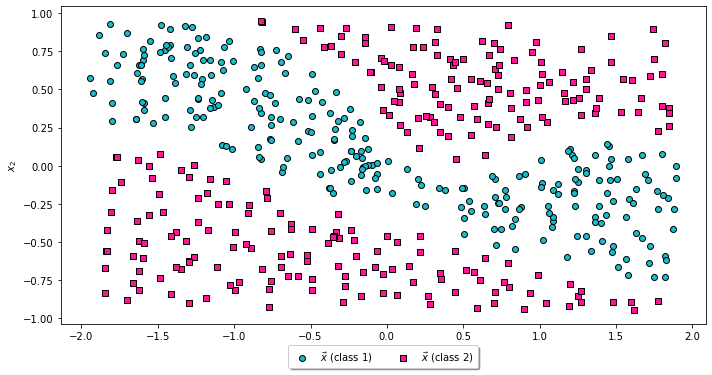

In [714]:
fig = plot_input_space(X, Y, None)
fig.savefig("data-4-samples", dpi=600)

## K-means Clustering

In [715]:
D = X_train.shape[1]# if len(X_train.shape) > 1 else 1
"D", D

('D', 2)

In [716]:
def p_norm(x, y, p=2, root=False):
    if root:
        return np.sum(np.power(x - y, p), axis=-1) ** (1/p)
    else: # save some computation for the comparison sake
        return np.sum(np.power(x - y, p), axis=-1)

def k_means(C, data, T=10):
    N = len(data)
    prototypes = data[np.random.choice(N, C)]
#     print("prototypes", prototypes)

    for t in range(T):
#         print("prototypes\n", prototypes)
        for k in range(N):
            # greedy
            dist = p_norm(data[k], prototypes, p=2)
            min_j = np.argmin(dist)
#             print("dist", min_j, data[k], dist)

            # update
            old_prototypes = prototypes.copy()
            prototypes[min_j] += CONFIG["rbf"]["alpha"] * (data[k] - prototypes[min_j])

            if np.all(prototypes == old_prototypes):
                break
    print(f"Done @ iteration {t+1}")
    return prototypes

In [725]:
CONFIG["rbf"]["J"] = 100

In [741]:
prototypes = k_means(C=CONFIG["rbf"]["J"], data=X_train, T=30)

Done @ iteration 30


In [490]:
saved_prototypes = prototypes.copy()

In [488]:
prototypes = saved_prototypes.copy()

In [548]:
saved_prototypes

array([[ 1.43322817, -0.88075736],
       [-0.7514001 ,  0.19047874],
       [ 0.17839753,  0.6075227 ],
       [ 1.24645746, -0.12433531],
       [ 1.71324478,  0.53263723],
       [ 0.79229892,  0.53428008],
       [ 0.63993202, -0.76590291],
       [-1.27718458, -0.2863219 ],
       [-0.42327094,  0.71685813],
       [-1.58553437, -0.69836299],
       [-1.08751293,  0.62205899],
       [ 1.30866777,  0.54864246],
       [ 0.55660448, -0.17582527],
       [ 1.56971794, -0.57577576],
       [-0.18485298, -0.65433605],
       [-0.80274818, -0.54032095],
       [-1.64176657,  0.65427623],
       [-1.62038847,  0.11333682],
       [ 1.79331523, -0.2142749 ],
       [-0.18238338,  0.0765822 ]])

In [545]:
[h.mu for h in nn.hidden_units]

[array([ 1.10756287, -1.0278043 ]),
 array([-0.82644267,  0.12110828]),
 array([0.81615583, 0.47624179]),
 array([ 0.47616443, -0.22568644]),
 array([1.50903291, 0.72457148]),
 array([0.15055996, 0.34590574]),
 array([ 0.22035822, -0.71172163]),
 array([-1.54629881, -0.367864  ]),
 array([-0.4513401,  1.0035656]),
 array([-2.21475738, -1.8441807 ]),
 array([-0.63497807,  0.66049402]),
 array([ 1.26698966, -0.22603729]),
 array([0.17453072, 0.86070074]),
 array([ 1.82854602, -0.44022838]),
 array([-0.19897246,  0.08831918]),
 array([-0.68299283, -0.57746791]),
 array([-1.97229973,  0.69032144]),
 array([-1.33434015,  0.58989016]),
 array([1.97272706, 0.33684192]),
 array([-0.81342324,  0.13001466])]

## Create a RBF_NN instance

In [742]:
nn = RBF_NN(num_rbf=CONFIG["rbf"]["J"], num_out=C, learning_rate=CONFIG["learning_rate"])
nn.add_radial_units(prototypes, fx="multivariate", sigmas=None)

## Haykin's universal $\sigma$

$$ \sigma = \frac{d_\text{max}}{\sqrt{2K}} $$

$$ \Sigma_1 = \Sigma_2 = I\sigma^2$$

In [744]:
nn.initialize_universal_sigma(X_train)

cov [[1.33692647 0.        ]
 [0.         1.33692647]] (100, 2, 2)


## $\sigma$ per neuron

$$ \sigma^2_k = \frac{1}{N-1} \sum_{i=1}^{N} (\vec{x} - \vec{\mu}_k)(\vec{x} - \vec{\mu}_k)^T $$
$$ \sigma_k = \sqrt{\frac{1}{N-1} \sum_{i=1}^{N} (\vec{x} - \vec{\mu}_k)(\vec{x} - \vec{\mu}_k)^T} $$

$$ \Sigma_k = I\sigma_k^2 $$

In [743]:
nn.initialize_sigma_per_neuron(X_train, matrix=True)

cov [[[ 1.65006689e-02  5.37385042e-03]
  [ 5.37385042e-03  1.13487445e-02]]

 [[            nan             nan]
  [            nan             nan]]

 [[ 7.79353104e-03 -1.34554066e-03]
  [-1.34554066e-03  2.20588695e-03]]

 [[ 4.12330905e-03  9.60061444e-05]
  [ 9.60061444e-05  2.99258822e-03]]

 [[ 2.14836741e-02  1.70526732e-03]
  [ 1.70526732e-03  5.23755735e-03]]

 [[ 1.80150884e-02 -1.00151864e-02]
  [-1.00151864e-02  5.92954124e-03]]

 [[ 6.93721818e-04 -4.18935903e-03]
  [-4.18935903e-03  2.68805869e-02]]

 [[ 3.19328824e-02 -8.27689336e-03]
  [-8.27689336e-03  7.85725218e-03]]

 [[ 2.06815817e-03  2.26050831e-03]
  [ 2.26050831e-03  1.09689192e-02]]

 [[ 7.65803850e-03 -5.56399246e-03]
  [-5.56399246e-03  1.15516248e-02]]

 [[            inf            -inf]
  [           -inf             inf]]

 [[ 1.83565297e-02  5.31306731e-03]
  [ 5.31306731e-03  8.71130132e-03]]

 [[            nan             nan]
  [            nan             nan]]

 [[            nan             nan

<ipython-input-373-678f1df981d4>:206: RuntimeWarning: invalid value encountered in true_divide
  covariances[p] = cov / (len(cluster_data) - 1)
<ipython-input-373-678f1df981d4>:206: RuntimeWarning: divide by zero encountered in true_divide
  covariances[p] = cov / (len(cluster_data) - 1)


In [724]:
cov = np.array([h.sigma for h in nn.hidden_units])
cov.min(), cov.max()

(-0.013107435084802763, 0.089574735973436)

$$ \sigma^2_kู = \sum_{i=1}^{N} ||\vec{x} - \vec{\mu}_k||^2 $$

$$ \sigma_k^2 = \frac{1}{N-1} \sum_{i=1}^{N} ||\vec{x} - \vec{\mu}_k||^2 $$

$$ \sigma_k^2 = \frac{1}{N - 1} \sum_{i=1}^{N} (x_{i,1} - \mu_{k,1})^2 + (x_{i,2} - \mu_{k,2})^2 $$

- $\sigma_k$ is the standard deviation of cluster $k$
- $\mu_k$ is the mean of cluster $k$

In [88]:
# nn.initialize_sigma_per_neuron(X_train, matrix=False)

## $\sigma$ per class

$$ \sigma_j = \sqrt{ \frac{1}{P} \sum_{p=1}^{P} \frac{1}{M_p - 1} \sum_{i=1}^{M_p} (x_{i,1} - \mu_{p,1})^2 + (x_{i,2} - \mu_{p,2})^2} $$

- $\sigma_j$ is the standard deviation of class $j$
- $M_p$ = # of samples in cluster $p$
- $p = 1,\dots,P$ prototypes

In [550]:
nn.initialize_sigma_per_class(X_train, Y_train)

sigmas
 [0.05118816 0.09135216]


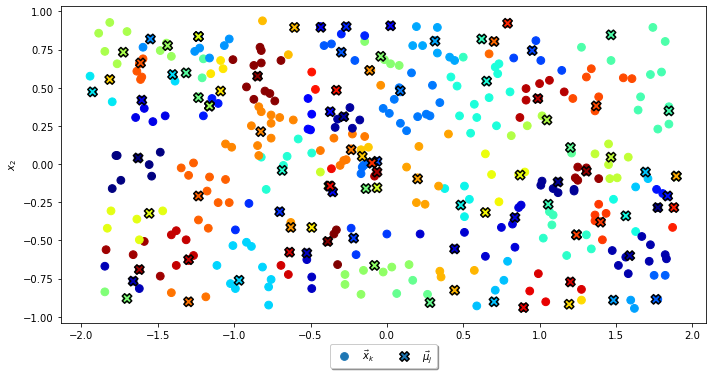

In [745]:
N = len(X_train)
crisp_membership = np.zeros(N)
means = np.array([rbf.mu for rbf in nn.hidden_units])
for k in range(N):
    dist = p_norm(X_train[k], means, p=2)
    crisp_membership[k] = np.argmin(dist)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

sample_plot = ax.scatter(X_train[:, 0], X_train[:, 1], c=crisp_membership, cmap="jet", s=60, label="$\\vec{x}_k$")
mean_plot = ax.scatter(means[:, 0], means[:, 1], marker="X", c=np.arange(len(means)), cmap="jet", s=90, linewidth=1.5, edgecolor="black", label="$\\vec{\mu_j}$")

# from mpl_toolkits.axes_grid1 import make_axes_locatable
# divider = make_axes_locatable(ax)
# cax = divider.append_axes('right', size='2%', pad=0.05)
# plt.colorbar(sample_plot, cax=cax)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)

ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_aspect(1)
plt.tight_layout()
fig.savefig("100_prototypes.png", dpi=600)

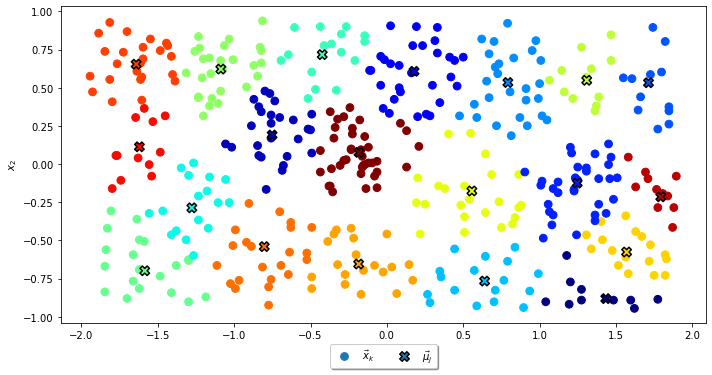

In [494]:
N = len(X_train)
crisp_membership = np.zeros(N)
means = np.array([rbf.mu for rbf in nn.hidden_units])
for k in range(N):
    dist = p_norm(X_train[k], means, p=2)
    crisp_membership[k] = np.argmin(dist)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

sample_plot = ax.scatter(X_train[:, 0], X_train[:, 1], c=crisp_membership, cmap="jet", s=60, label="$\\vec{x}_k$")
mean_plot = ax.scatter(means[:, 0], means[:, 1], marker="X", c=np.arange(len(means)), cmap="jet", s=90, linewidth=1.5, edgecolor="black", label="$\\vec{\mu_j}$")

# from mpl_toolkits.axes_grid1 import make_axes_locatable
# divider = make_axes_locatable(ax)
# cax = divider.append_axes('right', size='2%', pad=0.05)
# plt.colorbar(sample_plot, cax=cax)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)

ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_aspect(1)
plt.tight_layout()
fig.savefig("20_prototypes.png", dpi=600)

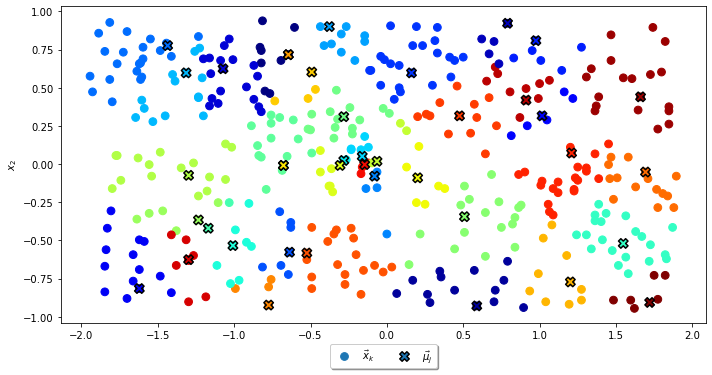

In [232]:
N = len(X_train)
crisp_membership = np.zeros(N)
means = np.array([rbf.mu for rbf in nn.hidden_units])
for k in range(N):
    dist = p_norm(X_train[k], means, p=2)
    crisp_membership[k] = np.argmin(dist)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

sample_plot = ax.scatter(X_train[:, 0], X_train[:, 1], c=crisp_membership, cmap="jet", s=60, label="$\\vec{x}_k$")
mean_plot = ax.scatter(means[:, 0], means[:, 1], marker="X", c=np.arange(len(means)), cmap="jet", s=90, linewidth=1.5, edgecolor="black", label="$\\vec{\mu_j}$")

# from mpl_toolkits.axes_grid1 import make_axes_locatable
# divider = make_axes_locatable(ax)
# cax = divider.append_axes('right', size='2%', pad=0.05)
# plt.colorbar(sample_plot, cax=cax)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)

ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_aspect(1)
plt.tight_layout()
fig.savefig("40_prototypes.png", dpi=600)

In [732]:
nn_w_begin = nn.w.copy()

In [739]:
nn.w = nn_w_begin.copy()

In [740]:
print(nn.evaluate(X_train, Y_train))

<ipython-input-373-678f1df981d4>:22: RuntimeWarning: overflow encountered in exp
  return np.exp(-0.5 * ((x - self.mu).T @ np.linalg.inv(self.sigma) @ (x - self.mu))) / np.sqrt(((2 * np.pi) ** len(self.mu)) * np.linalg.det(self.sigma))
<ipython-input-373-678f1df981d4>:22: RuntimeWarning: invalid value encountered in sqrt
  return np.exp(-0.5 * ((x - self.mu).T @ np.linalg.inv(self.sigma) @ (x - self.mu))) / np.sqrt(((2 * np.pi) ** len(self.mu)) * np.linalg.det(self.sigma))


LinAlgError: Singular matrix

In [734]:
print("before w", nn.w)
pred_Y, _ = nn.forward(X_train)
nn.LMS(X_train, Y_train)
print("-----")
print("LMS w", nn.w)

print("TRAIN =====================")
print(nn.evaluate(X_train, Y_train))
print("TEST ======================")
print(nn.evaluate(X_test, Y_test))

before w [[-0.45529221  0.40333835 -0.19383323  0.04299113  0.0440099  -0.32050499
  -0.40254728 -0.03191362  0.12889937 -0.07340131 -0.2128696  -0.36975036
   0.28880372  0.01210167  0.35517608  0.27519325  0.03616029  0.02139647
   0.01652875  0.31642377  0.02790421  0.28023094  0.27473028  0.43809128
   0.30966204 -0.37737026  0.0962532   0.33006987 -0.28303474 -0.35285433
   0.4474453   0.26978999 -0.03932959  0.42134226 -0.04294917 -0.42573365
   0.39765491  0.30853366 -0.46787743 -0.13757241  0.43887311  0.45307175
  -0.10347794  0.36733539 -0.49714594  0.3755018  -0.2164279  -0.07162754
   0.29456923  0.43060394 -0.06912782 -0.18225876  0.00808163  0.32682311
   0.34454688  0.45304753 -0.0821342  -0.23056221  0.04245028 -0.20683745
  -0.21219388 -0.00726546 -0.23225223  0.37898397 -0.47563109  0.041856
   0.07060706  0.48846291 -0.02385367  0.4102938  -0.03834487  0.19042186
  -0.37397575 -0.19459168 -0.17742647 -0.46481747 -0.39412316  0.05118359
   0.2519337  -0.37712209 -0.11

In [38]:
def save_confusion_matrix(nn, X, Y, title, filename):
    df_cm, _, _ = nn.evaluate(X, Y)
    figsize = [4, 4]
    cm_fig = pretty_plot_confusion_matrix(df_cm, cmap='Reds', show_null_values=1, title=title, figsize=figsize)
    cm_fig.savefig(filename + ".png", dpi=600, bbox_inches='tight')
    return cm_fig

<ipython-input-37-a1e9fece8a7d>:138: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  per_ok_s = ['%.2f%%'%(per_ok), '100%'] [per_ok == 100]


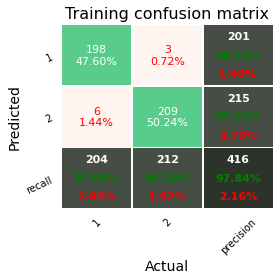

In [504]:
cm_fig = save_confusion_matrix(nn, X_train, Y_train, title="Training confusion matrix", filename="training-confusion_matrix")

<ipython-input-37-a1e9fece8a7d>:138: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  per_ok_s = ['%.2f%%'%(per_ok), '100%'] [per_ok == 100]


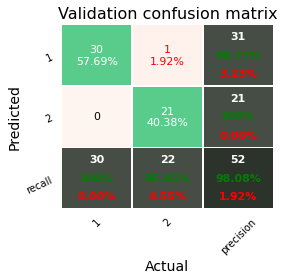

In [505]:
cm_fig = save_confusion_matrix(nn, X_val, Y_val, title="Validation confusion matrix", filename="validation-confusion_matrix")

<ipython-input-37-a1e9fece8a7d>:138: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  per_ok_s = ['%.2f%%'%(per_ok), '100%'] [per_ok == 100]


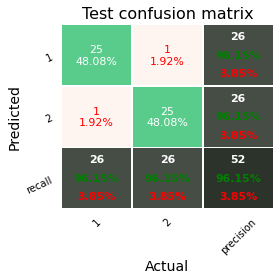

In [506]:
cm_fig = save_confusion_matrix(nn, X_test, Y_test, title="Test confusion matrix", filename="test-confusion_matrix")

In [28]:
print(nn.evaluate(X_test, Y_test))

(    0   1
0  26   0
1   2  24, 96.15384615384616, 0.10208865397225754)


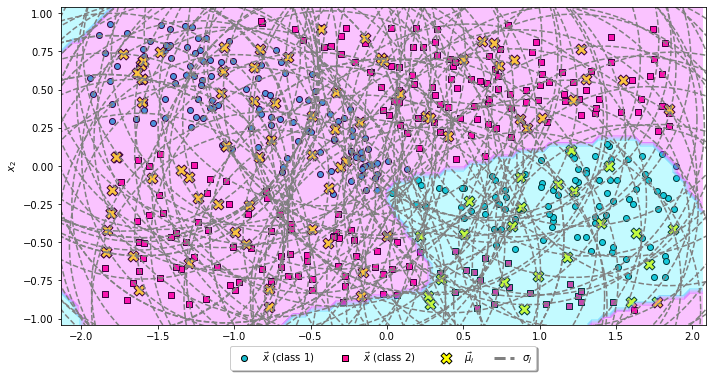

In [735]:
fig = plot_input_space(X, Y, nn, show_mean=True, decision_boundary=True, radial=True)
# fig.savefig("decision_boundary.png", dpi=600)

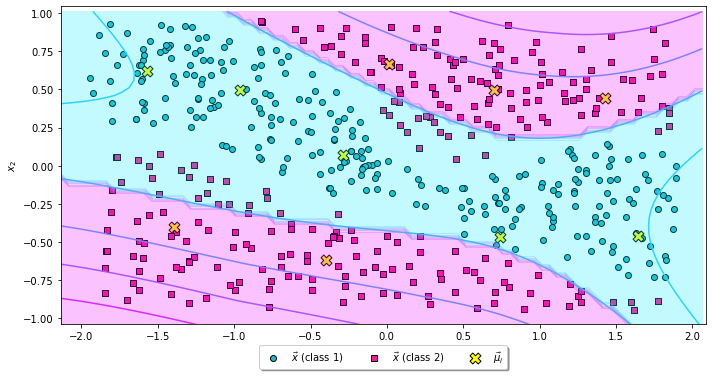

In [45]:
fig = plot_input_space(X, Y, nn, show_mean=True, decision_boundary=True, contour=True, radial=False)
fig.savefig("contour-decision_boundary.png", dpi=600)

In [131]:
print(nn.evaluate(X_test, Y_test))

(    0   1
0  25   1
1   1  25, 96.15384615384616, 0.1444882578729995)


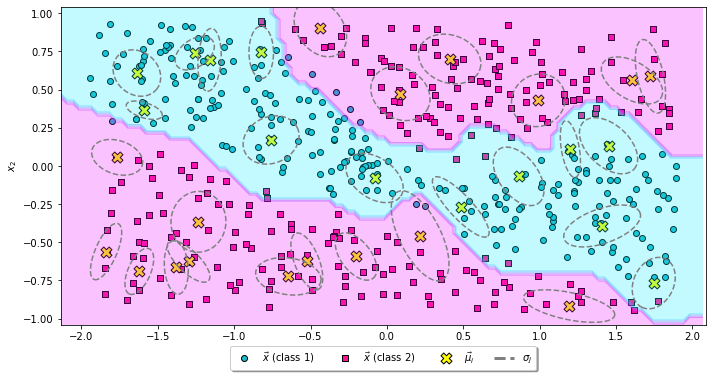

In [173]:
fig = plot_input_space(X, Y, nn, show_mean=True, decision_boundary=True, radial=True)
fig.savefig("sigma_neuron-radial-decision_boundary.png", dpi=600)

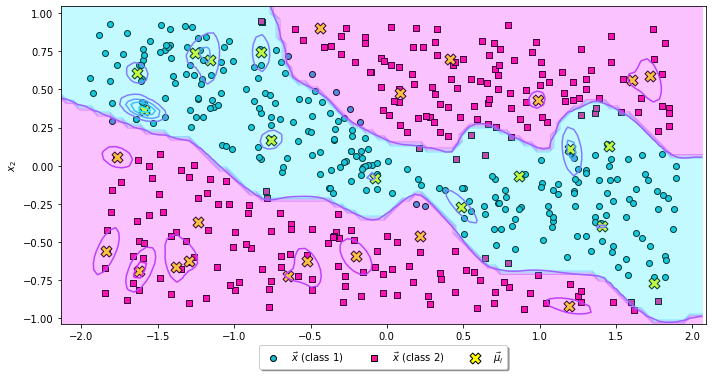

In [171]:
fig = plot_input_space(X, Y, nn, show_mean=True, decision_boundary=True, contour=True, radial=False)
fig.savefig("sigma_neuron-contour-decision_boundary.png", dpi=600)

In [791]:
print(nn.evaluate(X_test, Y_test))

(    0   1
0  22   2
1   3  25, 90.38461538461539, 0.09970858326924326)


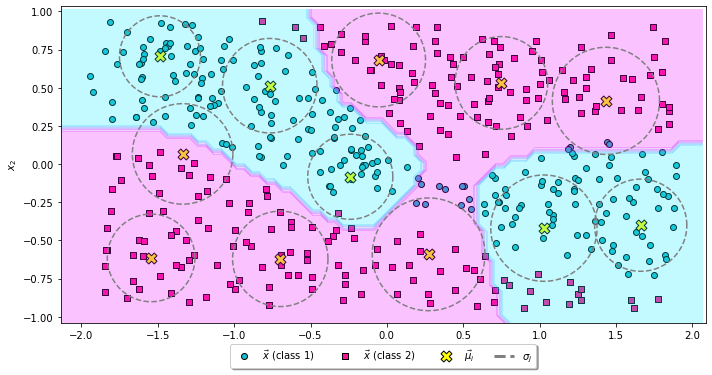

In [792]:
fig = plot_input_space(X, Y, nn, show_mean=True, decision_boundary=True, radial=True)

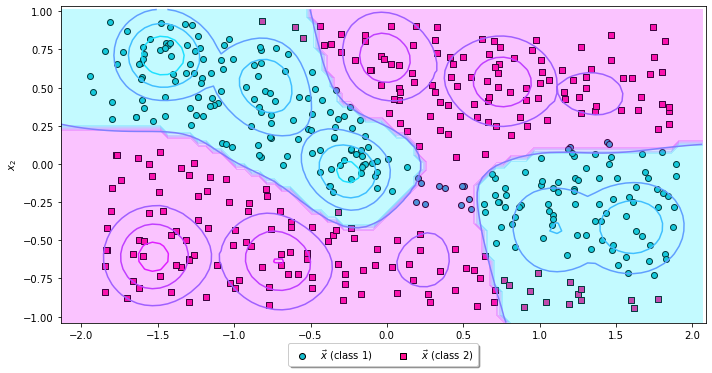

In [793]:
fig = plot_input_space(X, Y, nn, show_mean=True, decision_boundary=True, contour=True, radial=False)

In [116]:
print(nn.evaluate(X_test, Y_test))

(    0   1
0  25   1
1   1  25, 96.15384615384616, 0.04968608700719173)


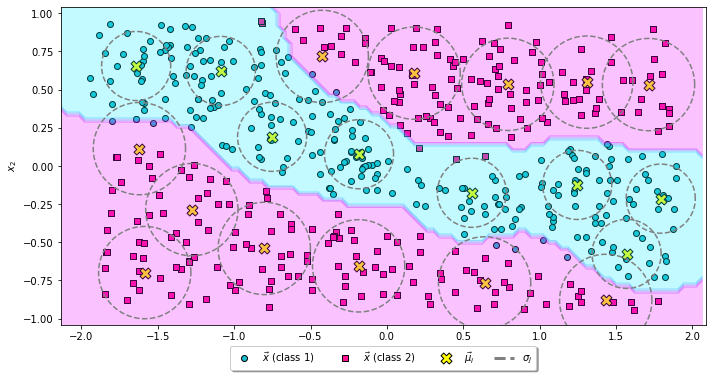

In [497]:
fig = plot_input_space(X, Y, nn, show_mean=True, decision_boundary=True, radial=True)
fig.savefig("rbf20-sigma_class-radial-decision_boundary.png", dpi=600)

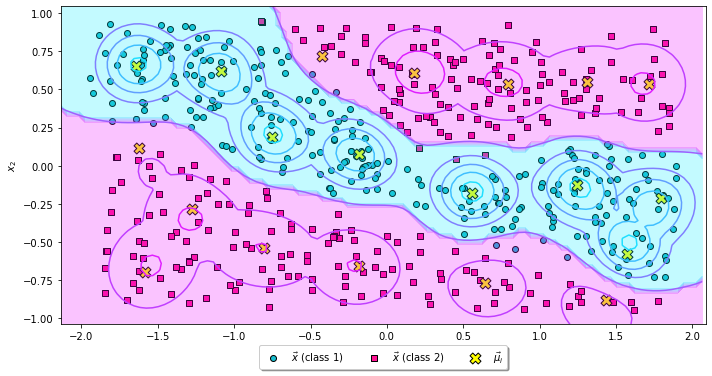

In [496]:
fig = plot_input_space(X, Y, nn, show_mean=True, decision_boundary=True, contour=True, radial=False)
fig.savefig("rbf20-sigma_class-contour-decision_boundary.png", dpi=600)

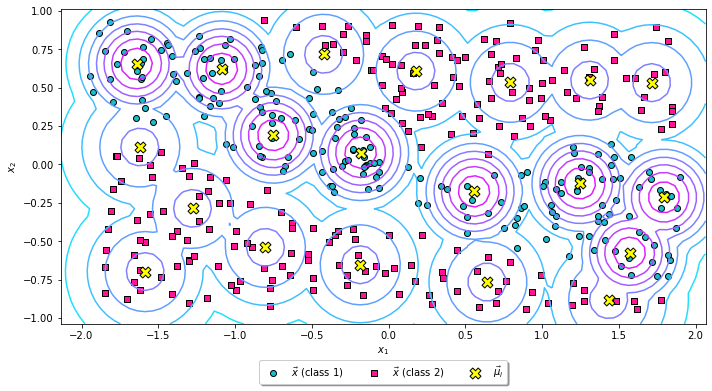

In [521]:
def plot_con(X, Y, nn, show_mean=False, decision_boundary=False, radial=False, contour=False):
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    colors = ['tab:cyan', 'deeppink']
    cmap = 'cool'
    markers = ['o', 's']

    labels = np.argmax(Y, axis=1)
    for i in range(len(np.unique(labels))):
        indices = np.where(labels == i)
        ax.scatter(X[indices, 0], X[indices, 1], c=colors[i], marker=markers[i], linewidth=1, edgecolor="black", label="$\\vec{x}$ (class " + str(i+1) +")")
    
    if nn:
        means = np.array([rbf.mu for rbf in nn.hidden_units])
        if show_mean:
            scatter = ax.scatter(means[:, 0], means[:, 1], marker="X", color="yellow", s=120, linewidth=1, edgecolor="black", label="$\\vec{\mu_i}$")

    if decision_boundary or contour:
        x1_min, x1_max = ax.get_xlim()
        x2_min, x2_max = ax.get_ylim()

        resolution = 0.05
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                               np.arange(x2_min, x2_max, resolution))
        Z_raw, _ = nn.forward(np.c_[xx1.ravel(), xx2.ravel()])
        Z = np.argmax(Z_raw, axis=-1)
        Z = Z.reshape(xx1.shape)
    
    if decision_boundary:
        db_plot = ax.contourf(xx1, xx2, Z, alpha=0.25, cmap=cmap)
        ax.set_xlim(x1_min, x1_max)
        ax.set_ylim(x2_min, x2_max)
                
    if contour:
        Z = Z_raw[:, 0] - Z_raw[:, 1]
        Z = Z.reshape(xx1.shape)

        fin_Z = []
        for rbf in nn.hidden_units:
            X_grid = np.c_[xx1.ravel(), xx2.ravel()]
            Z_grid = np.zeros(len(X_grid))
            for i, x in enumerate(X_grid):
                Z_grid[i] = rbf.evaluate([x[0], x[1]])
            Z_grid = Z_grid.reshape(xx1.shape)
            fin_Z.append(Z_grid)
        fin_Z = np.array(fin_Z)
        fin_Z = np.max(fin_Z, axis=0)
#         class_Z = -(fin_Z * Z)
        class_Z = fin_Z
        contour_plot = ax.contour(xx1, xx2, class_Z, cmap=cmap)
#         fig.colorbar(db_plot, ax=ax)
    
    handles, labels = ax.get_legend_handles_labels()
    
    if radial:
        covariances = [rbf.sigma for rbf in nn.hidden_units]
        for mean, covar in zip(means, covariances):
            eigval, eigvec = np.linalg.eig(covar)
            std_values = np.sqrt(eigval)

            mean_x, mean_y = mean

            major_idx = np.argmax(eigval)
            minor_idx = 1 if major_idx == 0 else 0

            alpha = np.arctan2(eigvec[1, major_idx], eigvec[0, major_idx])
            major_r_x = np.sqrt(std_values[major_idx])
            major_r_y = np.sqrt(std_values[minor_idx])

            theta = np.linspace(0, 2*np.pi, 100)
            e_X = major_r_x * np.cos(theta) * np.cos(alpha) - major_r_y * np.sin(theta) * np.sin(alpha) + mean_x
            e_Y = major_r_x * np.cos(theta) * np.sin(alpha) + major_r_y * np.sin(theta) * np.cos(alpha) + mean_y
            ax.plot(e_X, e_Y, color="gray", linestyle="--", alpha=0.5)
            
            # legends
            from matplotlib.lines import Line2D
            handles, labels = ax.get_legend_handles_labels()
            handles.append(Line2D([0], [0], color="gray", linewidth=3, linestyle='--'))
            labels.append("$\sigma_{j}$")        

    ax.set_xlabel("$x_1$")
    ax.set_ylabel("$x_2$")
    
    ax.set_aspect(1)

    ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=5)
    
    plt.tight_layout()
    return fig

fig = plot_con(X_train, Y_train, nn, show_mean=True, contour=True, radial=False)
fig.savefig("coverage.png", dpi=600)

In [239]:
print(nn.evaluate(X_train, Y_train))

(     0    1
0   80  124
1  106  106, 44.71153846153847, 0.5850021784128004)


In [54]:
print("before w", nn.w)
pred_Y, _ = nn.forward(X_train)
nn.LMS(X_train, Y_train)
print("-----")
print("LMS w", nn.w)

print("TRAIN =====================")
print(nn.evaluate(X_train, Y_train))
print("TEST ======================")
print(nn.evaluate(X_test, Y_test))

before w [[-0.38963411 -0.23046904  0.2489789   0.25904429  0.17327202 -0.31751733
   0.34035905 -0.18226264  0.01885788 -0.09649167]
 [-0.17802242  0.03556361 -0.06917642  0.21671238  0.08365325 -0.12149058
   0.06103408 -0.3852768   0.34282554  0.38021574]]
-----
LMS w [[  14347.31852377  -65281.63493059 -131682.46009658  -95590.06074354
   127364.13878776  -51517.5418479    80517.6845614     7841.34705487
   -29787.70820608  142768.63953682]
 [ -14918.3283451    66762.90751633  131724.9016155    96629.61746936
  -128243.85398423   52485.54838238  -81559.71294744   -6723.29563016
    29725.10247947 -144735.12516439]]
TRAIN =====================
(     0    1
0  236    0
1   32  200, 93.16239316239316, 0.08939703050151926)
TEST ======================
(    0   1
0  24   0
1   6  22, 88.46153846153845, 0.11044621745902948)


In [522]:
nn_w_begin = nn.w.copy()

In [748]:
nn.learning_rate = 1

In [64]:
nn.learning_rate

0.001

In [242]:
lr_losses = {}

In [749]:
loss = []

train loss = 0.0009: 100%|█████████████████████████████████████████████████████████████| 50/50 [02:07<00:00,  2.54s/it]

(    1   2
1  18   8
2   6  20, 73.07692307692307, 0.1815909137316338)


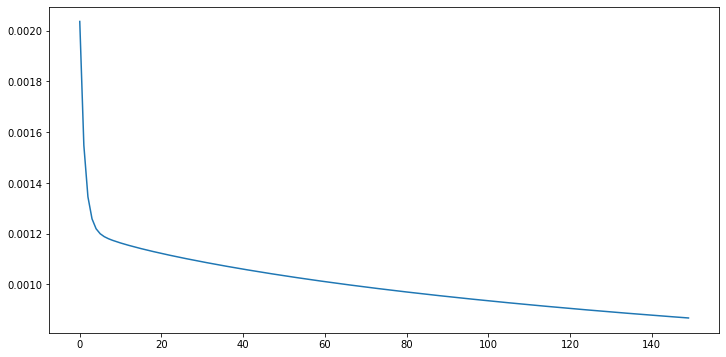

In [751]:
# nn.w = nn_w_begin.copy() # <----------

for epoch in (pbar := tqdm(range(50))):
#     print("epoch", epoch, nn.w)
    pred_Y, Phi = nn.forward(X_train)

    E = MSE(Y_train, pred_Y)
    train_error = np.mean(E)
    loss.append(train_error)

    all_e = Y_train - pred_Y
    nn.update(all_e, Phi, X_train, learn_w=True, learn_mu=True)

    pbar.set_description(f"train loss = {train_error:.4f}")

print(nn.evaluate(X_test, Y_test))

plt.figure(figsize=(12, 6))
plt.plot(loss)
plt.show()

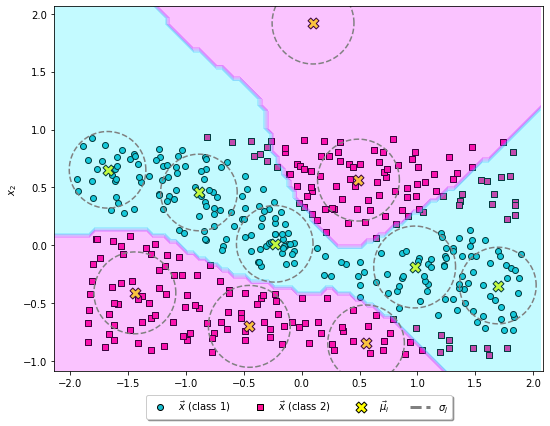

In [73]:
fig = plot_input_space(X_train, Y_train, nn, show_mean=True, decision_boundary=True, radial=True)
# fig.savefig("decision_boundary.png", dpi=600)

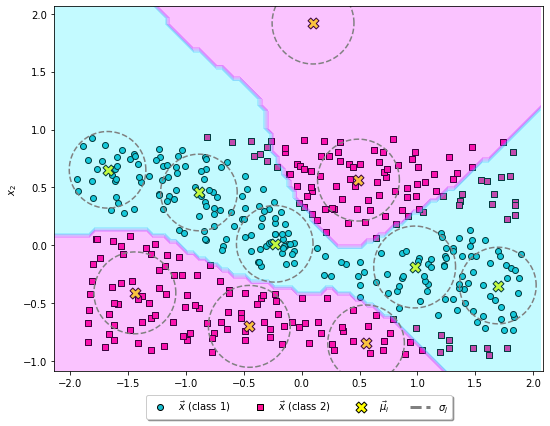

In [72]:
fig = plot_input_space(X_train, Y_train, nn, show_mean=True, decision_boundary=True, radial=True)

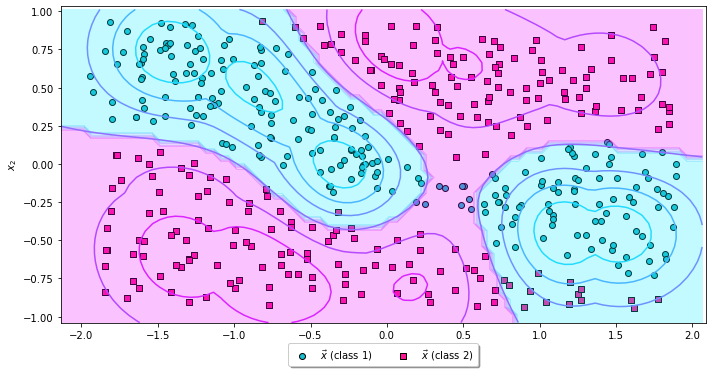

In [757]:
fig = plot_input_space(X_train, Y_train, nn, show_mean=True, decision_boundary=True, contour=True, radial=False)

In [374]:
plt.figure()
plt.plot(val_losses)

NameError: name 'val_losses' is not defined

<Figure size 432x288 with 0 Axes>

In [356]:
nn.evaluate(X_train, Y_train)

(     0    1
 0  236    0
 1   26  206,
 94.44444444444444,
 0.07241301258656897)

### Weight visualization

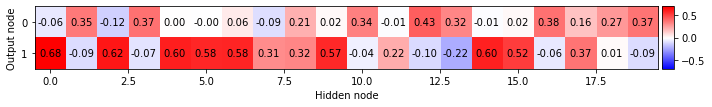

In [509]:
fig = nn.visualize_weight(figsize=(10, 2))#(6, 2)#(12, 3)
fig.savefig("rbf20-lms-sigma_class-weights", dpi=600)

### Feed forward

In [258]:
nn.evaluate(X, Y)

(     0   1
 0  166  94
 1  176  84,
 48.07692307692308,
 0.528899344215896)

In [172]:
def save_params(epoch, loss, prototypes, weights):
    params = {
        "prototypes": prototypes,
        "weights": weights
    }
    np.save(CONFIG["experiment_name"] + ".npy", params)

In [661]:
nn_w_begin = nn.w.copy()

In [524]:
CONFIG["batch_size"]["train"] = 1

In [671]:
CONFIG["epochs"] = 50

In [659]:
nn.learning_rate = 0.1

In [660]:
# lr_losses = {}

In [514]:
# for i in range(len(saved_prototypes)):
#     print(nn.hidden_units[i].mu)
#     nn.hidden_units[i].mu = saved_prototypes[i]

In [672]:
nn.w = nn_w_begin.copy()

_, mean_val_acc, mean_val_loss  = nn.evaluate(X_test, Y_test)
min_val_loss = mean_val_loss

train_accs, train_losses = [], []
    
train_bests = [True]
val_losses = [mean_val_loss]
val_accs = [mean_val_acc]

train_acc = 0
val_acc = 0

In [673]:
num_batch = int(len(X) / CONFIG["batch_size"]["train"])
print("num_batch", num_batch, "size of", CONFIG["batch_size"]["train"])
for epoch in (pbar := tqdm(range(CONFIG["epochs"]))):
    # train
    X_batches = np.array_split(X_train, num_batch)
    Y_batches = np.array_split(Y_train, num_batch)
    rand_ind = np.random.permutation(num_batch)
    for idx in rand_ind:
        X_batch = X_batches[idx]
        Y_batch = Y_batches[idx]
        if len(Y_batch) > 0:
            pred_Y, Phi = nn.forward(X_batch)
            all_e = Y_batch - pred_Y
            nn.update(all_e, Phi, X_batch, learn_w=True, learn_mu=False)
            _, train_acc, train_loss = nn.evaluate(X_batch, Y_batch)
            train_accs.append(train_acc)
            train_losses.append(train_loss)
            pbar.set_description(f"@{epoch+1}: accuracy = [train:{train_acc:.2f}][val:{val_acc:.2f}]%, loss = [train:{train_loss:.6f}][val:{mean_val_loss:.6f}]")

    # validation
    _, val_acc, mean_val_loss = nn.evaluate(X_val, Y_val)
    val_accs.append(val_acc)
    val_losses.append(mean_val_loss)
    is_best = mean_val_loss < min_val_loss
    train_bests.append(is_best)
    if is_best:
        min_val_loss = mean_val_loss
#         save_params(epoch, min_val_loss, prototypes, nn.w)
        
    pbar.set_description(f"@{epoch+1}: accuracy = [train:{train_acc:.2f}][val:{val_acc:.2f}]%, loss = [train:{train_loss:.6f}][val:{mean_val_loss:.6f}]")

@1: accuracy = [train:100.00][val:0.00]%, loss = [train:0.274431][val:0.327478]:   0%|          | 0/50 [00:00<?, ?it/s]

num_batch 520 size of 1


@1: accuracy = [train:100.00][val:0.00]%, loss = [train:0.006139][val:0.327478]:   0%|          | 0/50 [00:01<?, ?it/s]


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1 is different from 2)

In [668]:
x = X_train[0]
for i in range(nn.num_rbf):
    print(i, nn.hidden_units[i].multivariate_gaussian(x))

0 7.45888798455998e-21
1 3.0586041702753845e-09
2 1.5556572419617203e-89
3 5.414591398203723e-103
4 3.8100601215286156e-137
5 1.0816805056582699e-251
6 0.14903245869915913
7 2.0076682448938654e-05
8 3.027688303987623e-135
9 1.2708408557880128e-96
10 6.937414750661164e-15
11 0.0
12 0.0
13 0.0
14 0.0
15 0.0
16 7.750823242752761e-53
17 0.0
18 1.2728365407221914e-145
19 1.5898297270533262e-180


In [555]:
nn_cm, nn_acc, nn_loss = nn.evaluate(X, Y)
nn_cm, nn_acc, nn_loss

(     1    2
 1  253    7
 2    5  255,
 97.6923076923077,
 0.04580823497162243)

In [556]:
lr_losses[str(nn.learning_rate) + "_w"] = {
    "train_accs": train_accs,
    "train_losses": train_losses,
    "val_accs": val_accs,
    "val_losses": val_losses,
    "weights": nn.w.copy(),
    "final_cm": nn_cm,
    "final_acc": nn_acc,
    "final_loss": nn_loss,
}

In [403]:
# nn.w = lr_losses["1"]["weights"]

In [419]:
backup_lr_losses = lr_losses.copy()

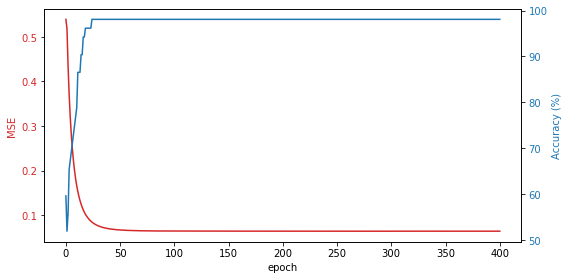

In [558]:
fig, ax1 = plt.subplots(figsize=(8, 4))

lr = str(nn.learning_rate) + "_w"
history = lr_losses[lr]
y1 = train_losses
y2 = train_accs
y3 = val_losses
y4 = val_accs

color = 'tab:red'
ax1.set_xlabel('epoch')
ax1.set_ylabel('MSE', color=color)
# ax1.plot(y1, color=color, label="train loss")
ax1.plot(y3, color=color, label="val loss")
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Accuracy (%)', color=color)  # we already handled the x-label with ax1
# ax2.plot(y2, color=color, label="train acc")
ax2.plot(y4, color=color, label="val acc")
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

fig.savefig(f"rbf20-lr_{lr}-learning_curve.png", dpi=600)

## Learning rates

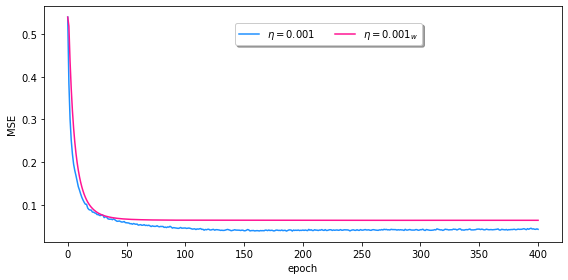

In [557]:
import matplotlib.colors as mcolors
colors = ["dodgerblue", "deeppink", "mediumslateblue", "forestgreen", "darkorange"]

fig, ax = plt.subplots(figsize=(8, 4))

for i, lr in enumerate(lr_losses):
    alpha = 1 if i != 4 else 0.3
    ax.plot(lr_losses[lr]["val_losses"], color=colors[i], alpha=alpha, label=f"$\eta = {lr}$")

ax.set_xlabel('epoch')
ax.set_ylabel('MSE')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.55, 0.95), fancybox=True, shadow=True, ncol=5)

fig.tight_layout()
plt.show()

fig.savefig("rbf20-learn_mu-learning_rates.png", dpi=600)

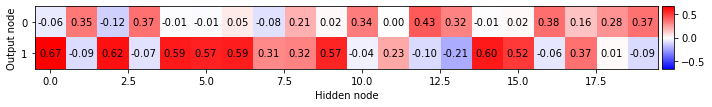

In [562]:
fig = nn.visualize_weight(figsize=(10, 2))#(6, 2)#(12, 3)
fig.savefig("rbf20-learn_w_lr1e_1-sigma_neuron-weights", dpi=600)

<ipython-input-37-a1e9fece8a7d>:138: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  per_ok_s = ['%.2f%%'%(per_ok), '100%'] [per_ok == 100]


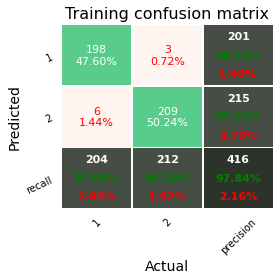

In [563]:
cm_fig = save_confusion_matrix(nn, X_train, Y_train, title="Training confusion matrix", filename="training-confusion_matrix")

<ipython-input-37-a1e9fece8a7d>:138: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  per_ok_s = ['%.2f%%'%(per_ok), '100%'] [per_ok == 100]


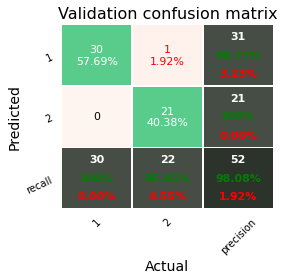

In [564]:
cm_fig = save_confusion_matrix(nn, X_val, Y_val, title="Validation confusion matrix", filename="validation-confusion_matrix")

<ipython-input-37-a1e9fece8a7d>:138: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  per_ok_s = ['%.2f%%'%(per_ok), '100%'] [per_ok == 100]


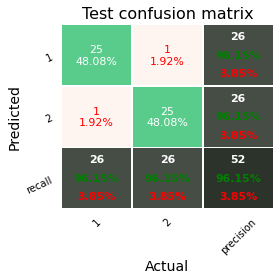

In [565]:
cm_fig = save_confusion_matrix(nn, X_test, Y_test, title="Test confusion matrix", filename="test-confusion_matrix")

In [566]:
print(nn.evaluate(X_test, Y_test))

(    1   2
1  25   1
2   1  25, 96.15384615384616, 0.05927705987401674)


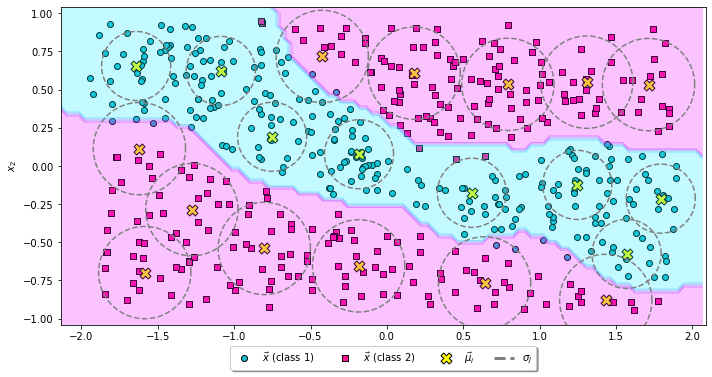

In [567]:
fig = plot_input_space(X, Y, nn, show_mean=True, decision_boundary=True, radial=True)
fig.savefig("decision_boundary.png", dpi=600)

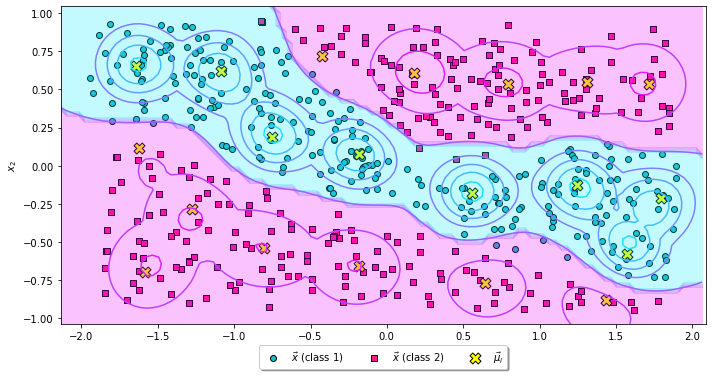

In [568]:
fig = plot_input_space(X, Y, nn, show_mean=True, decision_boundary=True, contour=True, radial=False)
fig.savefig("contour-decision_boundary.png", dpi=600)

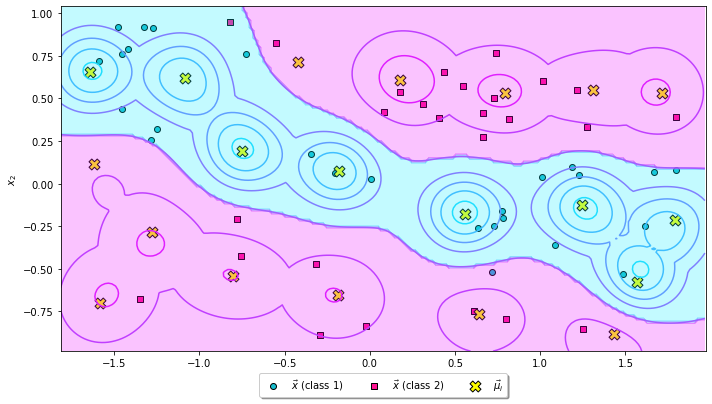

In [571]:
fig = plot_input_space(X_test, Y_test, nn, show_mean=True, decision_boundary=True, contour=True, radial=False)
fig.savefig("test-contour-decision_boundary.png", dpi=600)

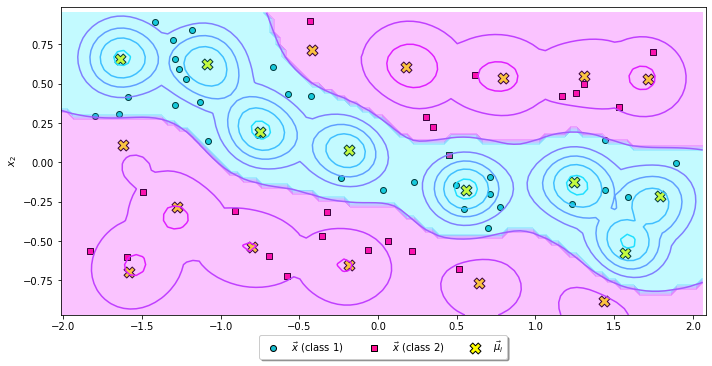

In [573]:
fig = plot_input_space(X_val, Y_val, nn, show_mean=True, decision_boundary=True, contour=True, radial=False)
fig.savefig("val-contour-decision_boundary.png", dpi=600)

## Training plot

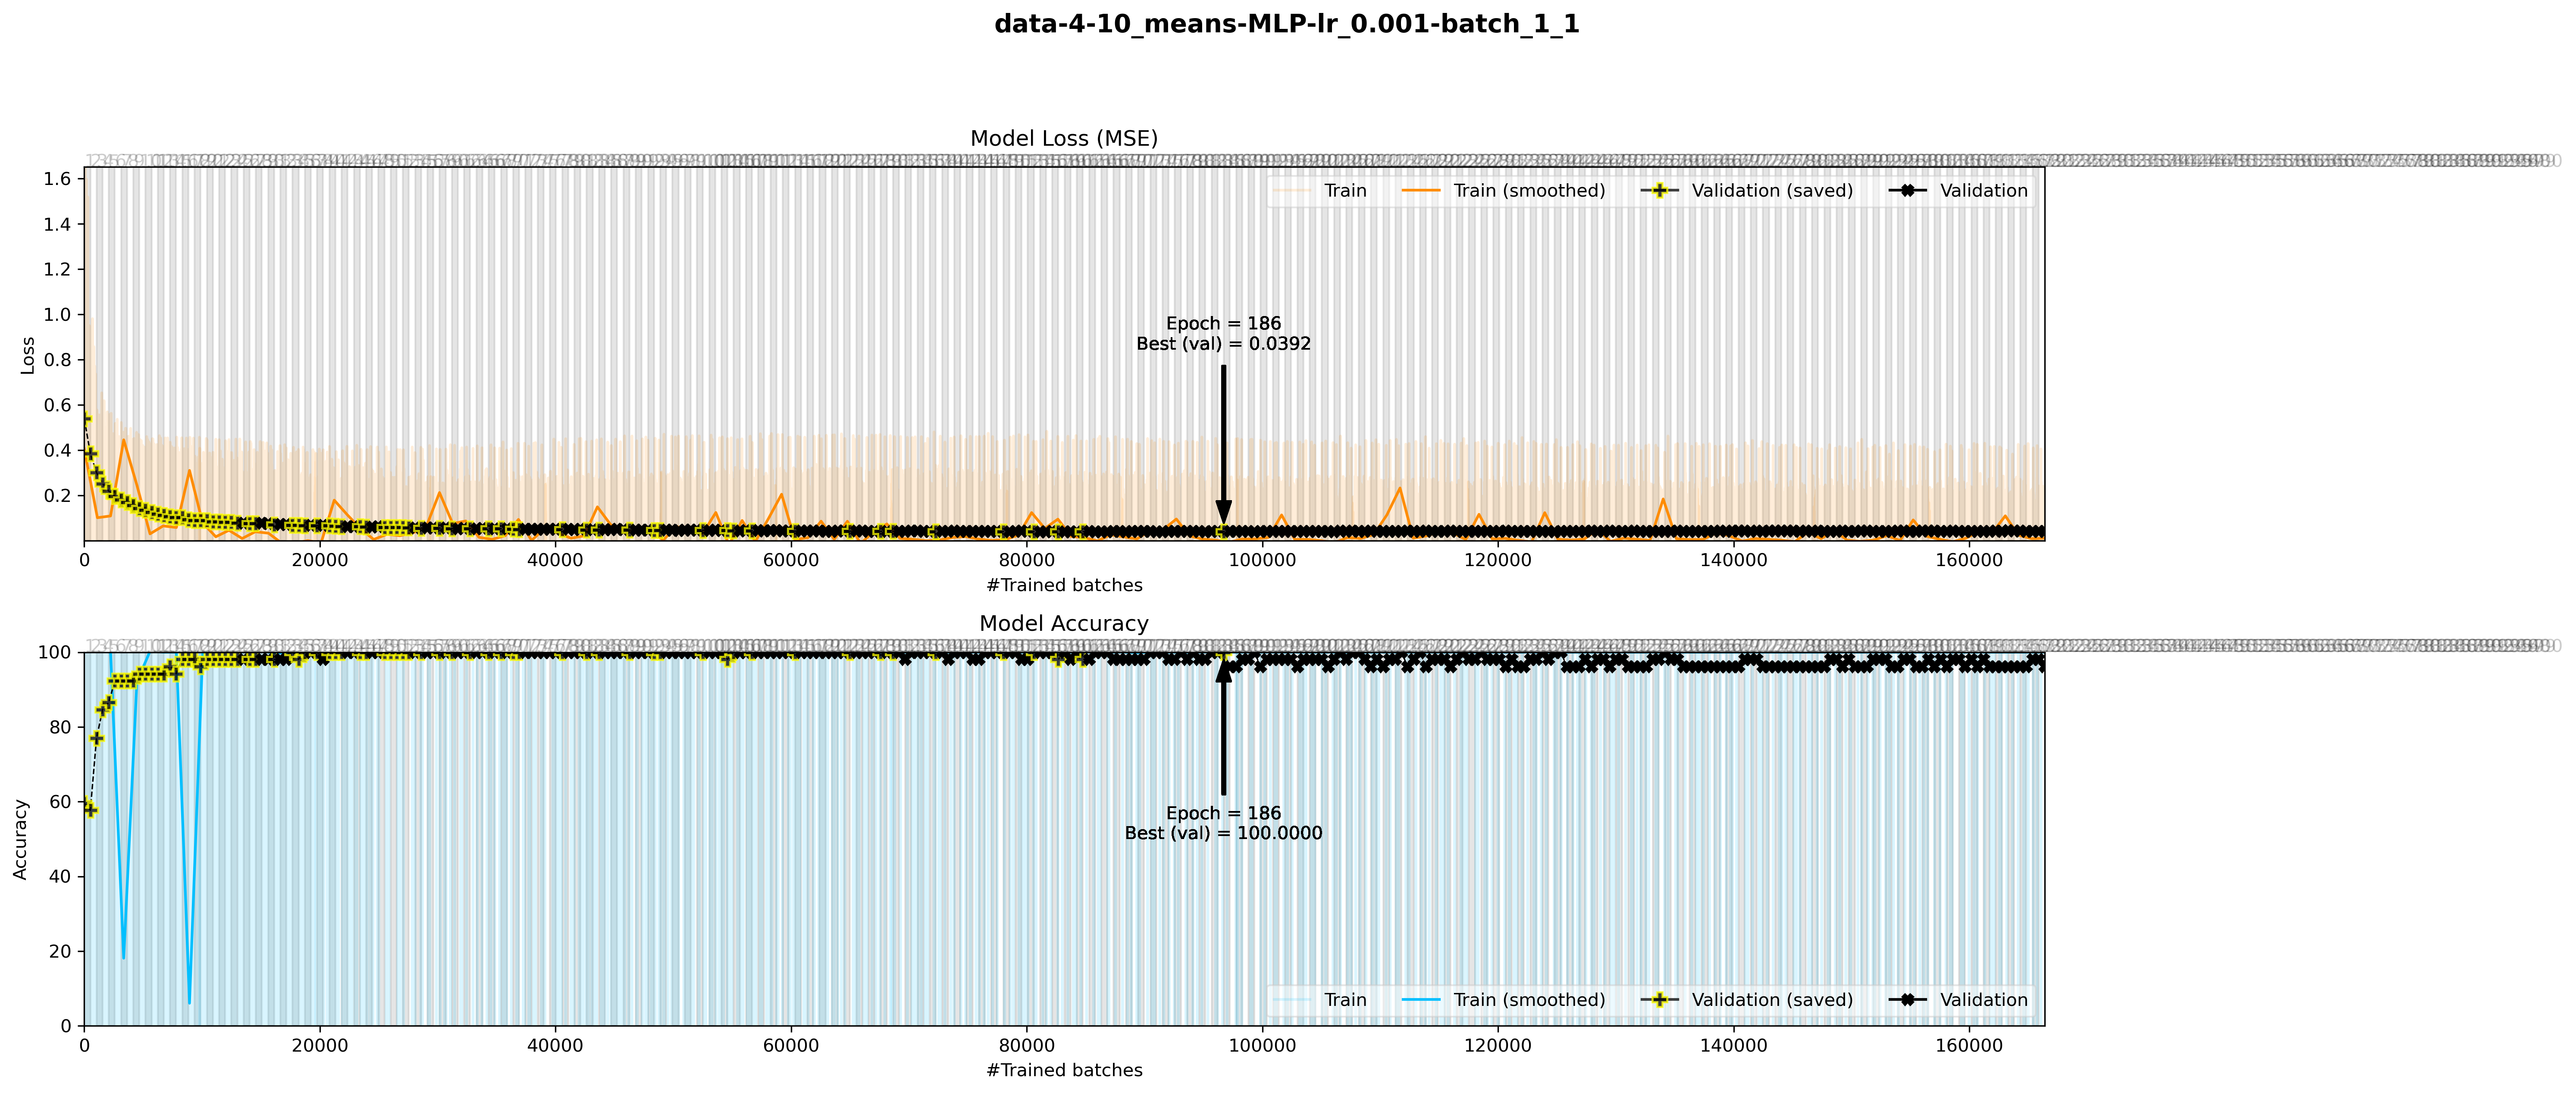

In [541]:
from scipy.interpolate import make_interp_spline, BSpline

import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

def plot_metric(x1, y1, x2, y2, batch_size, num_epoch, metric, color):
    # plot training
    t_plot, = plt.plot(x1, y1, label='Train', color=color, alpha=0.15)

    # plot smoothed version of training
    xnew = np.linspace(x1.min(), x1.max(), 150) # 150 represents number of points to make between x.min and x.max
    spl = make_interp_spline(x1, y1, k=3)  # type: BSpline
    power_smooth = spl(xnew)
    ts_plot, = plt.plot(xnew, power_smooth, label='Train (smoothed)', color=color)

    # plot validation
    v_better_plot = None
    v_not_plot = None
    # plot dotted line
    # print(len(x2), len(y2))
    plt.plot(x2[:-1], y2, 'k--', linewidth=0.8)
    # plot each point for customizing marker
    for idx, (vx, vy) in enumerate(zip(x2, y2)):
        style = {
            "color": "k",
            "marker": "X"
        }
        if train_bests[idx]:
            style = {
                **style,
                **{
                    "markersize": 8,
                    "markeredgecolor": 'yellow',
                    "markeredgewidth": 1.2,
                    "alpha": 0.75,
                    "marker": "P",
                }
            }

        v_plot, = plt.plot(vx, vy, label='Validation', **style)
        if train_bests[idx]:
            v_better_plot = v_plot
            v_plot.set_label("Validation (saved)")
        else:
            v_not_plot = v_plot
      
    # highlight odd epochs
    for epoch in range(num_epoch - 1):
        start_epoch = epoch*num_batch
        end_epoch = (epoch+1)*num_batch-1
        y_pos = max(y1)
        e_text = f"Epoch {epoch+1}" if num_epoch < 10 else f"{epoch+1}"
        plt.text(start_epoch, y_pos, e_text, alpha=0.2)
        if epoch % 2 == 0:
            plt.axvspan(start_epoch, end_epoch, alpha=0.2, color='grey')

        # the best model
        if metric == "Loss":
            ytext = (max(y1) + y2[last_best_epoch]) / 2
        else:
            ytext = (min(y1) + y2[last_best_epoch]) / 2
        best_text = f"Epoch = {last_best_epoch}\nBest (val) = {y2[last_best_epoch]:.4f}"
        plt.annotate(best_text, xy=(x2[last_best_epoch], y2[last_best_epoch]), xytext=(x2[last_best_epoch], ytext), arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=8), ha='center')

    title_name = f"Model {metric}"
    if metric == "Loss":
        title_name += f" (MSE)"
    plt.title(title_name, pad=12)
    plt.ylabel(metric)
    plt.xlabel('#Trained batches')
#     plt.xticks([i for i in range(0, x2[-1] + 1, int(batch_size / CONFIG["batch_size"]["train"]))], rotation=45)
    plt.xlim(xmin=0, xmax=len(train_losses))
    plt.ylim(ymin=min(min(y1),min(y2)), ymax=max(max(y1),max(y2)))
    handles = list(filter(None, [t_plot, ts_plot, v_better_plot, v_not_plot]))
    plt.legend(handles=handles, loc='best', ncol=5, framealpha=0.5)
    plt.tight_layout()
    return plt

fig = plt.figure(figsize=(20, 8), dpi= 300, facecolor='w', edgecolor='k')
suptitle = fig.suptitle(CONFIG["experiment_name"], fontsize=14, fontweight='bold', y=1.05)

num_epoch = len(val_losses)

last_best_epoch = next(i for i in reversed(range(len(train_bests))) if train_bests[i])

# loss
plt.subplot(211)
x1 = np.array(range(1, len(train_losses) + 1))
y1 = train_losses
x2 = np.array(range(0, num_epoch + 1)) * num_batch
y2 = val_losses
plt = plot_metric(x1, y1, x2, y2, CONFIG["batch_size"]["train"], num_epoch, metric="Loss", color="darkorange")

# accuracy
plt.subplot(212)
x1 = np.array(range(1, len(train_accs) + 1))
y1 = train_accs
y2 = val_accs
plt = plot_metric(x1, y1, x2, y2, CONFIG["batch_size"]["train"], num_epoch, metric="Accuracy", color="deepskyblue")

# fig.tight_layout()

# fig.savefig(f"{CONFIG['experiment_name']}-training_progress.png", dpi=600, bbox_inches='tight', bbox_extra_artists=[suptitle])

## Confusion matrix

<ipython-input-35-447e9d50c9cc>:138: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  per_ok_s = ['%.2f%%'%(per_ok), '100%'] [per_ok == 100]


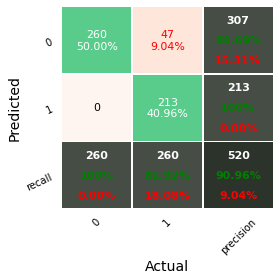

In [36]:
df_cm, _, _ = nn.evaluate(X, Y)
figsize = [4, 4]
cm_fig = pretty_plot_confusion_matrix(df_cm, cmap='Reds', show_null_values=1, title=f"Test confusion matrix", figsize=figsize)
cm_fig.savefig(f"x-test-confusion_matrix.png", dpi=600, bbox_inches='tight')

<hr />

## Regression Dataset

In [575]:
def create_regression_dataset(num):
    X = np.linspace(-10, 10, num=num)
    Y = 0.1*X*np.cos(X) + 0.1*np.random.normal(size=num)
    return X[:, None], Y[:, None]

In [576]:
X_train, Y_train = create_regression_dataset(num=900)
X_test, Y_test = create_regression_dataset(num=100)
N = X_train.shape[0]
C = 1
D = len(X_train[0])

In [686]:
def plot_regression(X, Y, nn, show_mean=False, decision_boundary=False, radial=False, contour=False, mean_color=False):
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    sample_color = "tab:cyan"
    cmap = 'cool'
    markers = ['o', 's']
    import matplotlib.colors as mcolors
    names = list(mcolors.TABLEAU_COLORS) + list(mcolors.BASE_COLORS) + ["deepskyblue", "crimson", "darkviolet", "orangered"]

    ax.scatter(X, Y, c=sample_color, marker='o', linewidth=1, edgecolor="black", label="$x$")
    
    if nn:
        means = np.array([rbf.mu for rbf in nn.hidden_units])
        if show_mean:
            if mean_color:
                N = len(X)
                crisp_membership = np.zeros(N)
                for k in range(N):
                    dist = p_norm(X[k], means, p=2)
                    crisp_membership[k] = np.argmin(dist)
                sample_plot = ax.scatter(X, Y, c=crisp_membership, cmap="jet", s=50, linewidth=1, edgecolor="black")
            else:
#             scatter = ax.scatter(means, np.zeros_like(means), marker="X", color="yellow", s=120, linewidth=1, edgecolor="black", label="$\\vec{\mu_i}$")
                for i, mean in enumerate(means):
                    ax.scatter(mean[0], 0, marker="X", color=names[i], s=120, linewidth=1, edgecolor="black", label="$\\vec{\mu_{" + str(i+1) + "}}$")

    if decision_boundary or contour:
        x1_min, x1_max = ax.get_xlim()
        resolution = 0.05
        xx1 = np.arange(x1_min, x1_max, resolution)
        Z_raw, _ = nn.forward(np.c_[xx1])
#         Z = np.argmax(Z_raw, axis=-1)
        Z = Z_raw.reshape(xx1.shape)
    
    if decision_boundary:
        db_plot = ax.plot(xx1, Z, linewidth=4, color="hotpink")
#         ax.set_xlim(x1_min, x1_max)
#         ax.set_ylim(x2_min, x2_max)
                
#     if contour:
#         ...
    
    handles, labels = ax.get_legend_handles_labels()
    
    if radial:
        covariances = [rbf.sigma for rbf in nn.hidden_units]
        for i, (mean, covar) in enumerate(zip(means, covariances)):
            eigval, eigvec = np.linalg.eig(covar)

            mean_x = mean

            where = (xx1 > mean_x-covar[0]) & (xx1 < mean_x+covar[0])
            ax.fill_between(xx1, 0, 1, where=where, color=names[i], alpha=0.15, transform=ax.get_xaxis_transform())
            
            # legends
            from matplotlib.lines import Line2D
            handles, labels = ax.get_legend_handles_labels()
            handles.append(Line2D([0], [0], color="black", linewidth=3, linestyle='--'))
            labels.append("$\sigma_{j}$")        

    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")
    
#     ax.set_aspect(1)

#     ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=9)
    
    plt.tight_layout()
    return fig

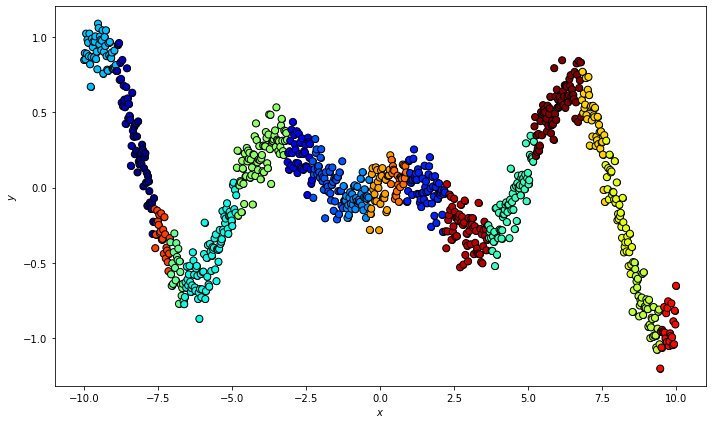

In [687]:
fig = plot_regression(X_train, Y_train, nn, show_mean=True, mean_color=True)
fig.savefig("regression-20_training_prototypes.png", dpi=600)

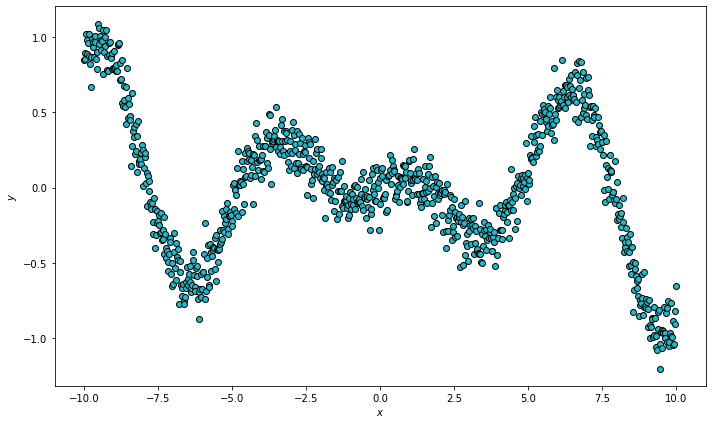

In [654]:
fig = plot_regression(X_train, Y_train, None)
fig.savefig("regression-training_samples.png", dpi=600)

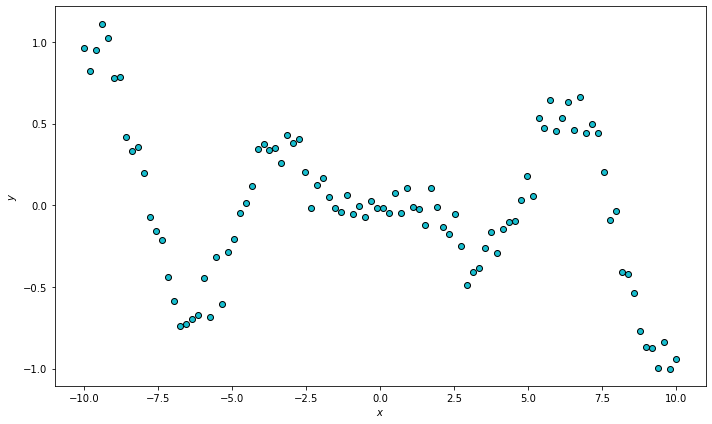

In [655]:
fig = plot_regression(X_test, Y_test, None)
fig.savefig("regression-test_samples.png", dpi=600)

In [581]:
CONFIG["rbf"]["J"] = 20

In [602]:
prototypes = k_means(C=CONFIG["rbf"]["J"], data=X_train, T=1)

Done @ iteration 1


In [656]:
nn = RBF_NN(num_rbf=CONFIG["rbf"]["J"], num_out=C, learning_rate=CONFIG["learning_rate"])
nn.add_radial_units(prototypes, sigmas=None, fx="multivariate") # covariances, covariance_outer_per_neuron, neuron_std_matrices, class_stds_matrices

In [657]:
nn.initialize_sigma_per_neuron(X_train, matrix=True)

cov [[[0.04380884]]

 [[0.03955125]]

 [[0.12123937]]

 [[0.26672464]]

 [[0.11132045]]

 [[0.07212227]]

 [[0.2334896 ]]

 [[0.65573261]]

 [[0.3208033 ]]

 [[0.02150278]]

 [[0.69900568]]

 [[0.09016442]]

 [[0.08931907]]

 [[0.06192379]]

 [[0.06614132]]

 [[0.02820552]]

 [[0.03038893]]

 [[0.03396164]]

 [[0.26190268]]

 [[0.32230825]]] (20, 1, 1)


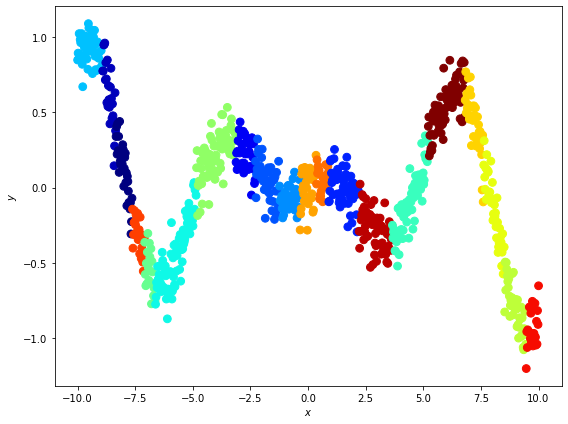

In [643]:
N = len(X_train)
crisp_membership = np.zeros(N)
means = np.array([rbf.mu for rbf in nn.hidden_units])
for k in range(N):
    dist = p_norm(X_train[k], means, p=2)
    crisp_membership[k] = np.argmin(dist)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

sample_plot = ax.scatter(X_train, Y_train, c=crisp_membership, cmap="jet", s=60)
# mean_plot = ax.scatter(means[:, 0], np.zeros_like(means), marker="X", c=np.arange(len(means)), cmap="jet", s=90, linewidth=1.5, edgecolor="black", label="$\\vec{\mu_i}$")

# from mpl_toolkits.axes_grid1 import make_axes_locatable
# divider = make_axes_locatable(ax)
# cax = divider.append_axes('right', size='2%', pad=0.05)
# plt.colorbar(sample_plot, cax=cax)

ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
# ax.set_aspect(1)
plt.tight_layout()

fig.savefig("regression-20_prototypes.png", dpi=600)

In [622]:
_, _, loss = nn.evaluate(X_train, Y_train, classification=False)
print(loss)

print("before w", nn.w)
pred_Y, _ = nn.forward(X_train)
nn.LMS(X_train, Y_train)
print("-----")
print("LMS w", nn.w)

print("TRAIN =====================")
_, _, loss = nn.evaluate(X_train, Y_train, classification=False)
print(loss)
print("TEST ======================")
_, _, loss = nn.evaluate(X_test, Y_test, classification=False)
print(loss)

6616735782093370.0
before w [[ 1.40919227e+08 -4.91842866e+07 -5.23730884e+07  1.50564630e+08
   6.29818409e+07 -1.89480323e+08  2.21024828e+07 -6.86802126e+07
   6.38906196e+07  8.87800474e+07 -1.17720026e+08 -9.92722442e+07
   2.44589852e+07  2.94555022e+07 -3.69674839e+07 -5.55974611e+06
  -5.13760627e+07  1.07177760e+07  1.44706647e+08 -6.79651598e+07]]
-----
LMS w [[ 7.84438497e-02 -1.00965888e-01 -5.40294812e-02  3.27835728e-02
  -3.31741161e-02 -6.77937922e-02  1.42824576e+00 -1.34439794e+00
  -1.43149093e-01  4.00486841e-03  7.40900583e-01 -8.10151699e-01
  -1.29789244e-01  1.92603136e-01 -1.57547145e-04  1.85811426e-02
  -1.12170055e-02 -4.68279780e-01 -4.62941108e-01  1.04189522e+00]]
TRAIN =====================
0.02286313442755561
TEST ======================
0.023592196846602572


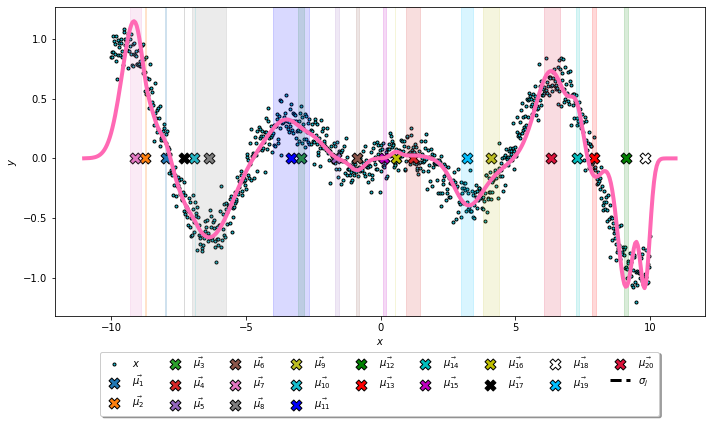

In [647]:
fig = plot_regression(X_train, Y_train, nn, show_mean=True, decision_boundary=True, radial=True)
fig.savefig("regression-rbf20-fit_curve.png", dpi=600)

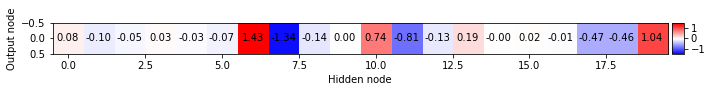

In [639]:
fig = nn.visualize_weight(figsize=(10, 1.5))
fig.savefig("regression-rbf20-weights.png", dpi=600)

In [699]:
def visualize_weight(nn, figsize=(8, 4)):
    grid = nn.w

    fig, ax = plt.subplots(1, figsize=figsize)
    v_abs = np.abs(max(grid.min(), grid.max()))
    im_plot = ax.imshow(grid, interpolation ='none', aspect='auto', cmap="bwr", vmin=-v_abs, vmax=v_abs)
    for (j, i), _ in np.ndenumerate(grid):
        label = f"{grid[j][i]:.4f}"
        ax.text(i,j,label,ha='center',va='center')

    from mpl_toolkits.axes_grid1 import make_axes_locatable
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='2%', pad=0.05)
    plt.colorbar(im_plot, cax=cax)

    ax.set_aspect(1)
    ax.set_xlabel("Hidden node")
    ax.set_ylabel("Output node")
    plt.tight_layout()
    plt.show() 
    return fig

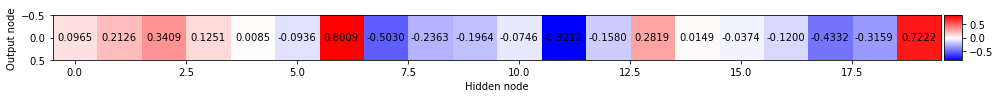

In [700]:
fig = visualize_weight(nn, figsize=(14, 1.5))
fig.savefig("regression-rbf20-weights.png", dpi=600)